# Business Understanding - ECG
ECG (Electrocardiogram) signals are electrical recordings of the heart's activity. They reflect the heart's function by showing the timing and strength of electrical impulses as they travel through the heart. <br>

An ECG (Electrocardiogram) is a test that records the electrical activity of your heart. It shows how the heart is beating and the strength of each beat.

Think of it like a graph that displays the heart's electrical signals, helping doctors see how well your heart is working.

<br>ECG signals are used to detect and monitor various heart conditions, such as arrhythmias, heart attacks, and other cardiac disorders.

The heart's electrical signals are impulses that coordinate the heartbeat by triggering contractions in the heart muscles.

<br>They provide critical information about the heart's rhythm, rate, and electrical conduction patterns, helping in diagnosis and treatment planning.

# **Set up**

## **Load Libraries**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Analysis | Statsmodel: https://github.com/statsmodels/statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf

# Prepare Train, Test Data, Data Scaling and Performance Matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay

# Isolation Forest
from sklearn.ensemble import IsolationForest

# Tensorflow Keras for CNN, LSTM AutoEncoders
from keras.models import Model, Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense, Conv1D, MaxPooling1D, Flatten, Dropout


## Set Up Google Colab Link to Data

In [ ]:
drive.mount('/content/drive/')
mypath = '/content/drive/MyDrive/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# EDA

In [ ]:
data_normal = pd.read_csv(mypath + 'ptbdb_normal.csv')
data_normal.shape


(4045, 188)

In [ ]:
data_normal.head()

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Verify if any filters are applied
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Columns: 188 entries, 1.000000000000000000e+00 to 0.000000000000000000e+00.65
dtypes: float64(188)
memory usage: 5.8 MB


In [ ]:
data_normal.describe().T

,count,mean,std,min,25%,50%,75%,max
1.000000000000000000e+00,4045.0,0.979665,0.029063,0.782178,0.964454,1.000000,1.000000,1.000000
9.003241658210754395e-01,4045.0,0.711439,0.186376,0.121784,0.580160,0.726231,0.863610,1.000000
3.585899472236633301e-01,4045.0,0.311665,0.183478,0.000000,0.164109,0.303182,0.436192,0.985955
5.145867168903350830e-02,4045.0,0.119592,0.110466,0.000000,0.028717,0.092677,0.187659,0.910798
4.659643396735191345e-02,4045.0,0.088618,0.075767,0.000000,0.027734,0.079580,0.134871,0.846591
...,...,...,...,...,...,...,...,...
0.000000000000000000e+00.61,4045.0,0.000895,0.015313,0.000000,0.000000,0.000000,0.000000,0.483471
0.000000000000000000e+00.62,4045.0,0.000454,0.010835,0.000000,0.000000,0.000000,0.000000,0.371502
0.000000000000000000e+00.63,4045.0,0.000474,0.011203,0.000000,0.000000,0.000000,0.000000,0.376668
0.000000000000000000e+00.64,4045.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
data_abnormal = pd.read_csv(mypath + 'ptbdb_abnormal.csv')
data_abnormal.shape

(10505, 188)

In [ ]:
data_abnormal.head()

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data_normal.describe().T

,count,mean,std,min,25%,50%,75%,max
1.000000000000000000e+00,4045.0,0.979665,0.029063,0.782178,0.964454,1.000000,1.000000,1.000000
9.003241658210754395e-01,4045.0,0.711439,0.186376,0.121784,0.580160,0.726231,0.863610,1.000000
3.585899472236633301e-01,4045.0,0.311665,0.183478,0.000000,0.164109,0.303182,0.436192,0.985955
5.145867168903350830e-02,4045.0,0.119592,0.110466,0.000000,0.028717,0.092677,0.187659,0.910798
4.659643396735191345e-02,4045.0,0.088618,0.075767,0.000000,0.027734,0.079580,0.134871,0.846591
...,...,...,...,...,...,...,...,...
0.000000000000000000e+00.61,4045.0,0.000895,0.015313,0.000000,0.000000,0.000000,0.000000,0.483471
0.000000000000000000e+00.62,4045.0,0.000454,0.010835,0.000000,0.000000,0.000000,0.000000,0.371502
0.000000000000000000e+00.63,4045.0,0.000474,0.011203,0.000000,0.000000,0.000000,0.000000,0.376668
0.000000000000000000e+00.64,4045.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## **Visulisation - Line Plot**

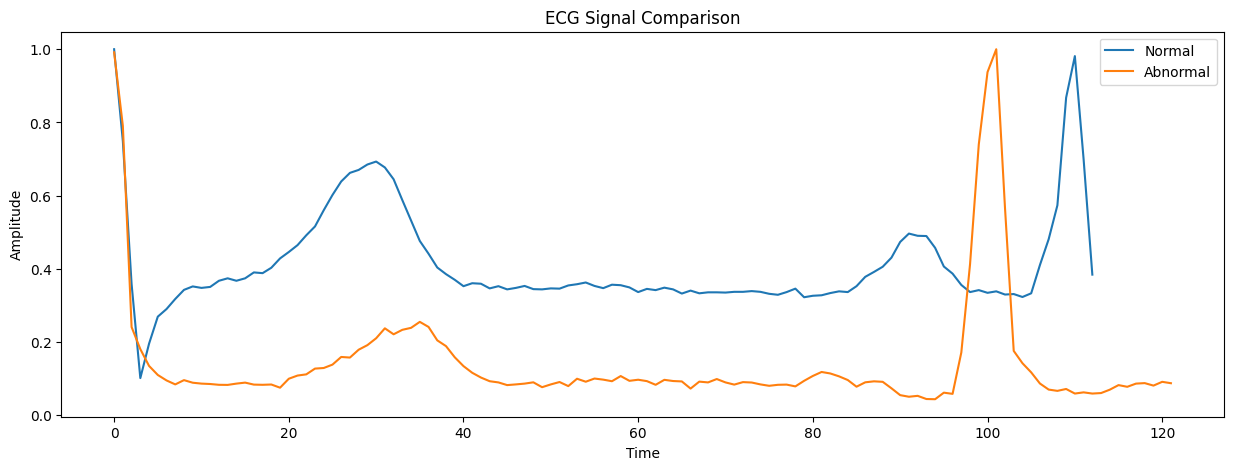

In [ ]:
sample_normal = data_normal.iloc[:,:-1].sample(1).values.flatten()
sample_normal = [s for s in sample_normal if s > 0]
sample_abnormal = data_abnormal.iloc[:,:-1].sample(1).values.flatten()
sample_abnormal = [s for s in sample_abnormal if s > 0]

# Visualize the first few samples
plt.figure(figsize=(15, 5))
plt.plot(sample_normal, label='Normal')
plt.plot(sample_abnormal, label='Abnormal')
plt.title('ECG Signal Comparison')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


## **Distribution - Hisplot**

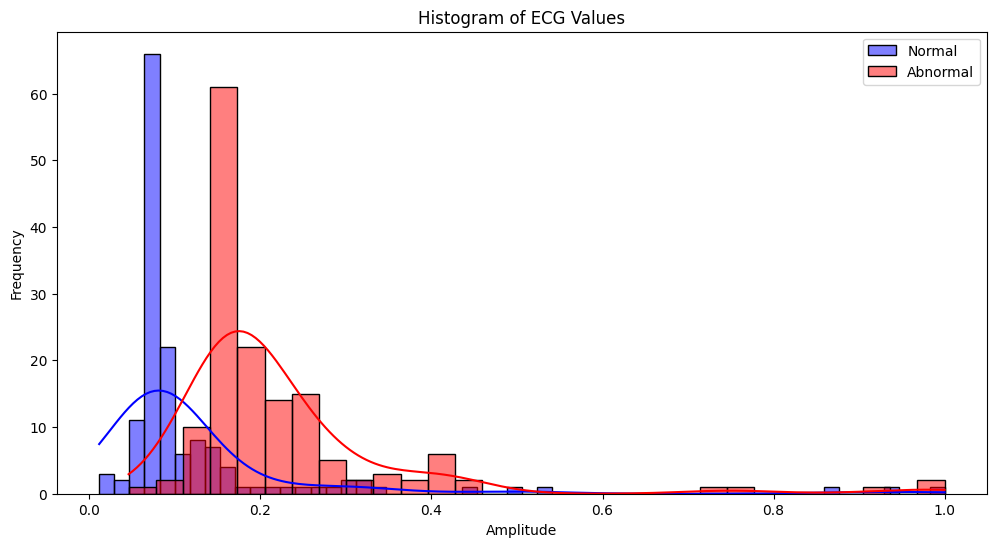

In [ ]:
# Plot histograms
plt.figure(figsize=(12, 6))
sns.histplot(sample_normal,
             kde=True,
             color='blue',
             label='Normal')
sns.histplot(sample_abnormal,
             kde=True,
             color='red',
             label='Abnormal')
plt.title('Histogram of ECG Values')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The KDE plot represents the data distribution as a continuous probability density curve, providing a smooth approximation of the histogram.

## **Distribution - Boxplot**

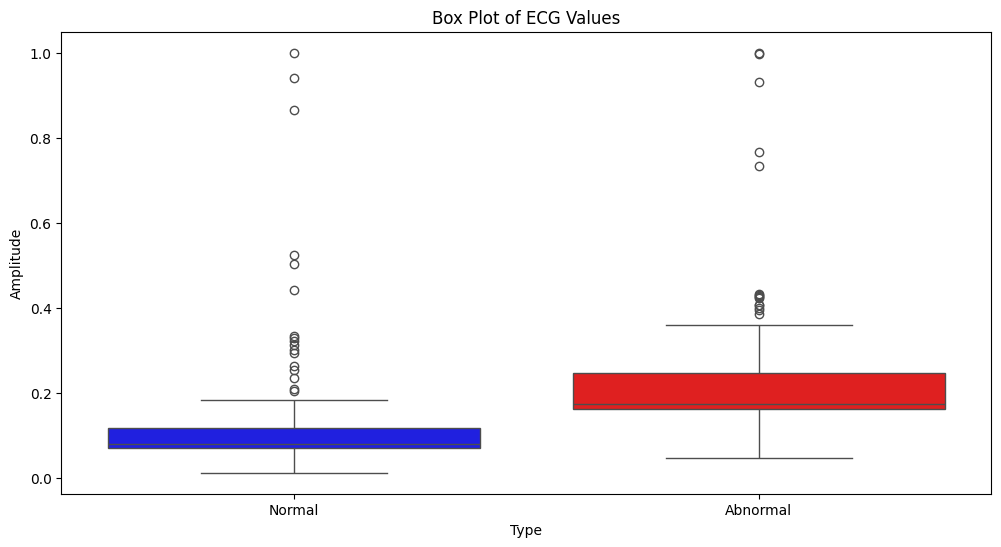

In [ ]:
# Plot box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=[sample_normal, sample_abnormal],
            palette=['blue', 'red'])
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.title('Box Plot of ECG Values')
plt.xlabel('Type')
plt.ylabel('Amplitude')
plt.show()

* Box: Spans from Q1 to Q3.
* Median: Line inside the box.
* Whiskers: Extend to the minimum and maximum values within 1.5 times the IQR.
* Outliers: Points outside the whiskers.

<br><br><br>
## **Decomposition**
**Decomposition in Time Series Analysis**

Time series decomposition involves breaking down a time series into several components to better understand its structure and behavior.

The main components are:

* **Trend:** The long-term progression or direction in the data.
* **Seasonality:** The repeating short-term cycle in the series.
* **Residual:** The remaining part after removing the trend and seasonality, which represents random noise or irregular patterns.

Interpreting Decomposition for Heart Beat

* **Trend:** Helps identify whether the heart's electrical activity is increasing or decreasing over time.
* **Seasonality:** May reveal periodic cycles, like regular heartbeats.
* **Residual:** Indicates anomalies or noise after removing trend and seasonality.

<br><br><br>

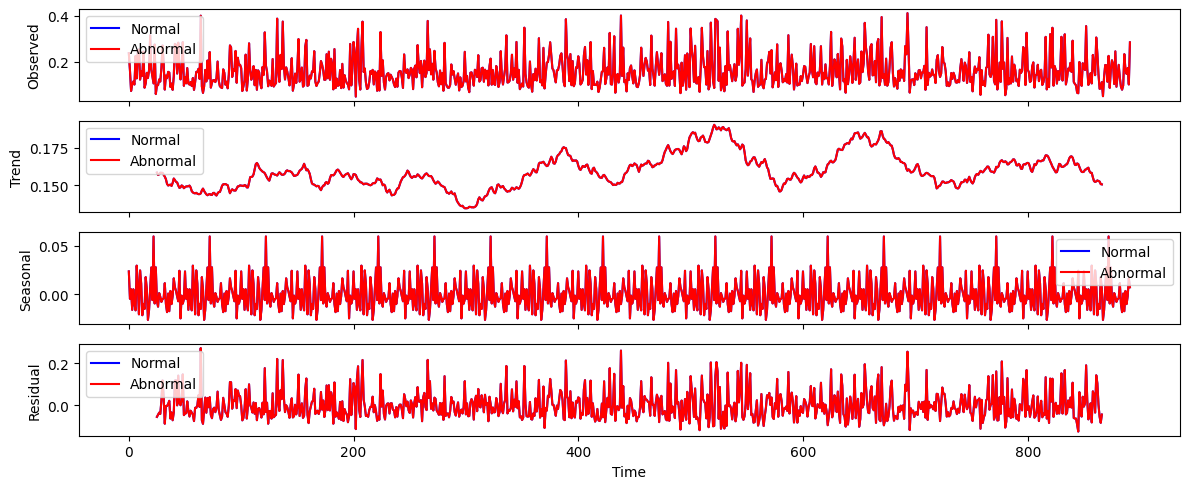

In [ ]:
# For decomposition, we need a continuous segment of the time series data
# Assuming 'value' column represents the ECG signal

data_normal['value'] = data_normal.mean(axis=1)
data_abnormal['value'] = data_abnormal.mean(axis=1)

# Decompose the time series
decomposition_normal = seasonal_decompose(data_normal['value'], period=50, model='additive')
decomposition_abnormal = seasonal_decompose(data_abnormal['value'], period=50, model='additive')

# Plot the decomposition results
fig, axes = plt.subplots(4, 1, figsize=(12, 5), sharex=True)

# Observed
axes[0].plot(decomposition_normal.observed, color='blue', label='Normal')
axes[0].plot(decomposition_abnormal.observed, color='red', label='Abnormal')
axes[0].set_ylabel('Observed')
axes[0].legend()

# Trend
axes[1].plot(decomposition_normal.trend, color='blue', label='Normal')
axes[1].plot(decomposition_abnormal.trend, color='red', label='Abnormal')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Seasonal
axes[2].plot(decomposition_normal.seasonal, color='blue', label='Normal')
axes[2].plot(decomposition_abnormal.seasonal, color='red', label='Abnormal')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Residual
axes[3].plot(decomposition_normal.resid, color='blue', label='Normal')
axes[3].plot(decomposition_abnormal.resid, color='red', label='Abnormal')
axes[3].set_ylabel('Residual')
axes[3].legend()

axes[3].set_xlabel('Time')

plt.tight_layout()
plt.show()


In [ ]:
decomposition_normal

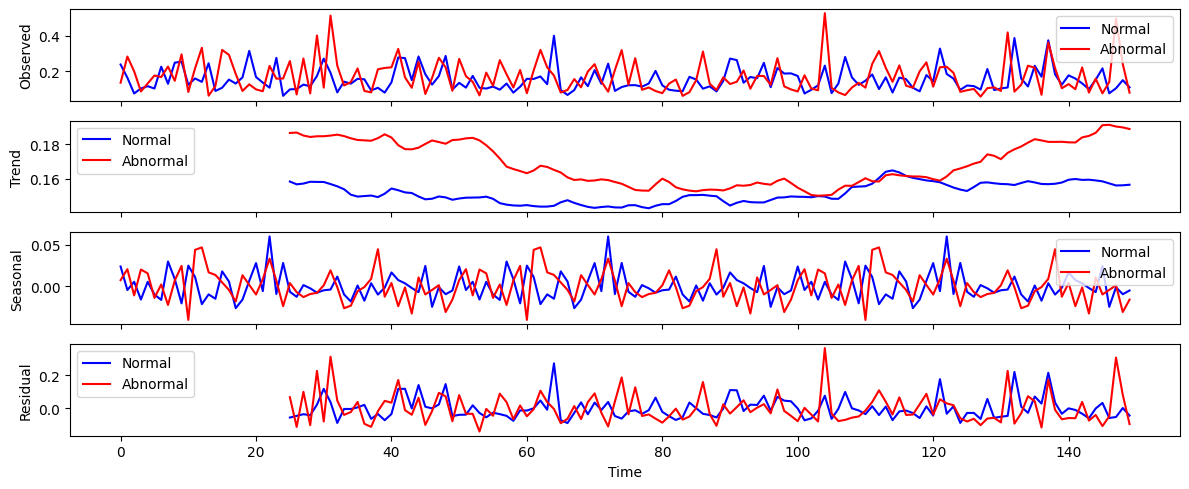

In [ ]:
# Decompose the time series
decomposition_normal = seasonal_decompose(data_normal['value'], period=50, model='additive')
decomposition_abnormal = seasonal_decompose(data_abnormal['value'], period=50, model='additive')

# Plot the decomposition results for a segment
segment = slice(0, 150)  # Adjust the segment as needed

fig, axes = plt.subplots(4, 1, figsize=(12, 5), sharex=True)

# Observed
axes[0].plot(decomposition_normal.observed[segment], color='blue', label='Normal')
axes[0].plot(decomposition_abnormal.observed[segment], color='red', label='Abnormal')
axes[0].set_ylabel('Observed')
axes[0].legend()

# Trend
axes[1].plot(decomposition_normal.trend[segment], color='blue', label='Normal')
axes[1].plot(decomposition_abnormal.trend[segment], color='red', label='Abnormal')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Seasonal
axes[2].plot(decomposition_normal.seasonal[segment], color='blue', label='Normal')
axes[2].plot(decomposition_abnormal.seasonal[segment], color='red', label='Abnormal')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Residual
axes[3].plot(decomposition_normal.resid[segment], color='blue', label='Normal')
axes[3].plot(decomposition_abnormal.resid[segment], color='red', label='Abnormal')
axes[3].set_ylabel('Residual')
axes[3].legend()

axes[3].set_xlabel('Time')

plt.tight_layout()
plt.show()


**Analyzing the Seasonality Graph**

Looking at the provided seasonality graph of normal and abnormal heartbeat data:

* **Seasonal Patterns:** Both the normal (blue) and abnormal (red) signals exhibit repeating patterns, suggesting the presence of seasonality.

* **Visual Analysis:** The peaks and troughs repeat at regular intervals, indicating that both datasets have seasonal components.
Interpretation
* **Seasonality in ECG Data:** The presence of seasonality in heartbeat data can be linked to the natural rhythm of the heartbeats. This is normal and expected in biological signals.

**Analyzing the Trend Component**

From the trend graph provided:

* **Normal ECG (Blue):** The trend remains relatively flat with minor fluctuations, indicating a stable baseline heart activity.
* **Abnormal ECG (Red):** The trend shows more pronounced fluctuations and higher values, indicating variability and potentially unstable heart activity over time.

**Interpretation**
* Presence of Trend: Both normal and abnormal ECG data exhibit trends. The normal ECG trend is more stable, while the abnormal ECG trend shows greater variability and higher values.
* Clinical Implication: A stable trend in normal ECG suggests consistent heart function, whereas the fluctuating trend in abnormal ECG may indicate underlying cardiac issues that require further investigation.

## **Rolling Statistics and Stationarity Check**

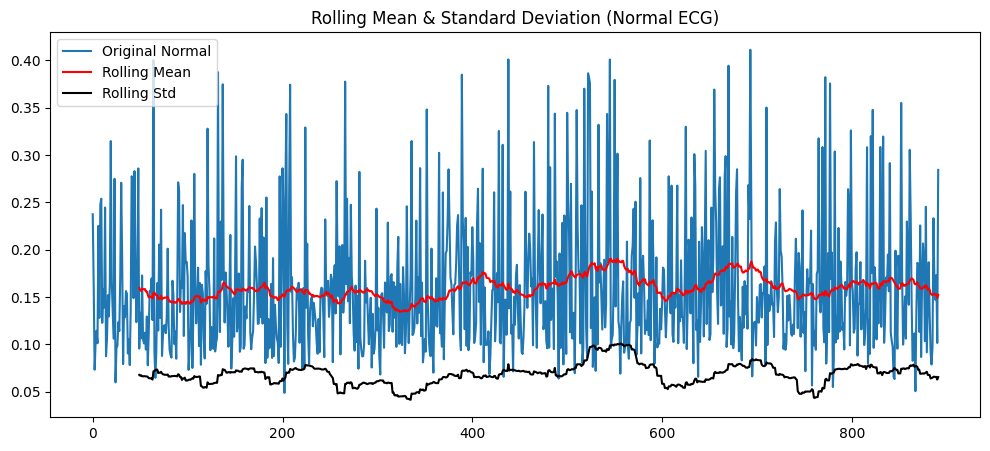

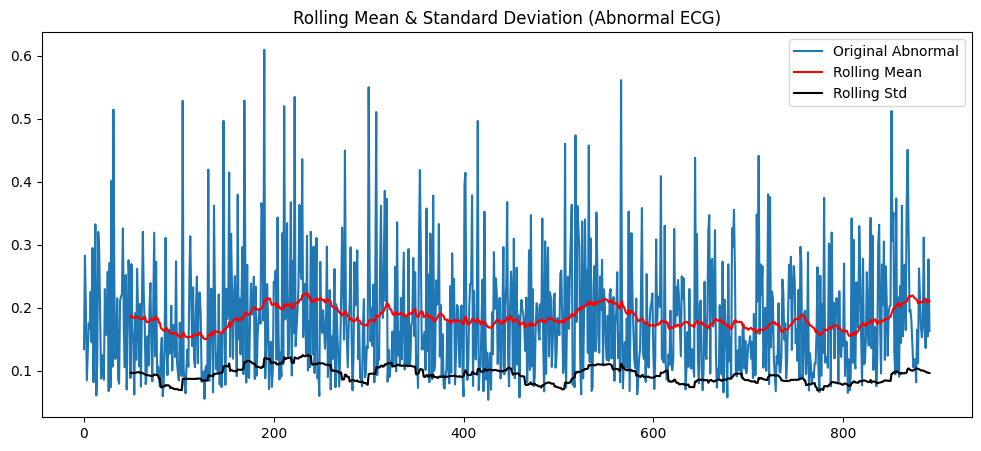

ADF Statistic (Normal): -29.412918486630037
p-value (Normal): 0.0
ADF Statistic (Abnormal): -31.076654035556743
p-value (Abnormal): 0.0


In [ ]:
# Calculate rolling statistics
rolling_mean_normal = data_normal['value'].rolling(window=50).mean()
rolling_std_normal = data_normal['value'].rolling(window=50).std()

rolling_mean_abnormal = data_abnormal['value'].rolling(window=50).mean()
rolling_std_abnormal = data_abnormal['value'].rolling(window=50).std()

plt.figure(figsize=(12, 5))
plt.plot(data_normal['value'], label='Original Normal')
plt.plot(rolling_mean_normal, color='red', label='Rolling Mean')
plt.plot(rolling_std_normal, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation (Normal ECG)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(data_abnormal['value'], label='Original Abnormal')
plt.plot(rolling_mean_abnormal, color='red', label='Rolling Mean')
plt.plot(rolling_std_abnormal, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation (Abnormal ECG)')
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller test
result_normal = adfuller(data_normal['value'])
result_abnormal = adfuller(data_abnormal['value'])

print('ADF Statistic (Normal):', result_normal[0])
print('p-value (Normal):', result_normal[1])

print('ADF Statistic (Abnormal):', result_abnormal[0])
print('p-value (Abnormal):', result_abnormal[1])


**Understanding Stationarity and Rolling Statistics**

Stationarity in a time series means that its statistical properties (mean, variance) do not change over time.

However, stationarity does not mean that the data points themselves do not change; rather, it means the overall distribution and behavior remain consistent.

Interpretation of the Graphs
From the provided graphs:

**Rolling Mean and Standard Deviation:**

**Normal ECG:** The rolling mean (red line) and rolling standard deviation (black line) fluctuate around a constant level, indicating the series is stationary. Despite the data points changing, the overall behavior remains consistent.

**Abnormal ECG:** Similarly, the rolling mean and standard deviation for the abnormal ECG also fluctuate but remain relatively stable, suggesting stationarity.

**ADF Test Results**
The Augmented Dickey-Fuller (ADF) test results further support this:

* *ADF Statistic (Normal):* -29.41, p-value: 0.0

* *ADF Statistic (Abnormal):* -31.08, p-value: 0.0
Both tests reject the null hypothesis of non-stationarity (p-value < 0.05), indicating that the time series for both normal and abnormal ECG signals are stationary.

**Summary**
* Stationary: Consistent statistical properties over time.
* Graphs: Rolling statistics help visualize this consistency.
* ADF Test: Confirms stationarity with significant results.

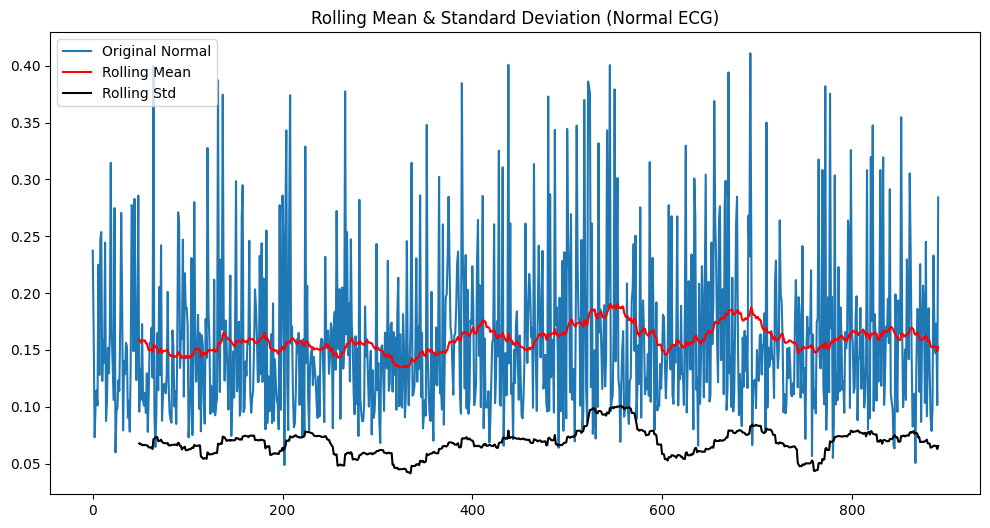

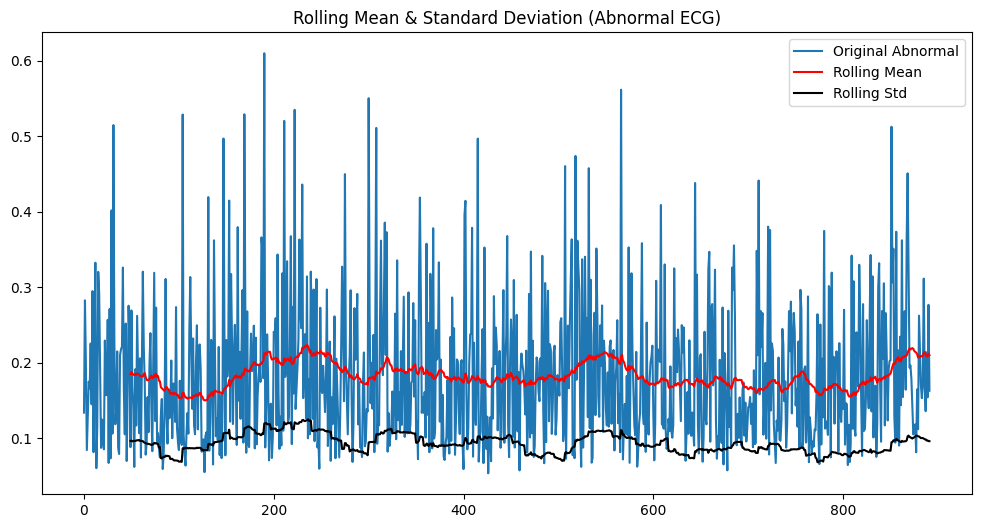

ADF Statistic (Normal): -29.412918486630037
p-value (Normal): 0.0
ADF Statistic (Abnormal): -31.076654035556743
p-value (Abnormal): 0.0


In [ ]:
# Calculate rolling statistics
rolling_mean_normal = data_normal['value'].rolling(window=50).mean()
rolling_std_normal = data_normal['value'].rolling(window=50).std()

rolling_mean_abnormal = data_abnormal['value'].rolling(window=50).mean()
rolling_std_abnormal = data_abnormal['value'].rolling(window=50).std()

plt.figure(figsize=(12, 6))
plt.plot(data_normal['value'], label='Original Normal')
plt.plot(rolling_mean_normal, color='red', label='Rolling Mean')
plt.plot(rolling_std_normal, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation (Normal ECG)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data_abnormal['value'], label='Original Abnormal')
plt.plot(rolling_mean_abnormal, color='red', label='Rolling Mean')
plt.plot(rolling_std_abnormal, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation (Abnormal ECG)')
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller test
result_normal = adfuller(data_normal['value'])
result_abnormal = adfuller(data_abnormal['value'])

print('ADF Statistic (Normal):', result_normal[0])
print('p-value (Normal):', result_normal[1])

print('ADF Statistic (Abnormal):', result_abnormal[0])
print('p-value (Abnormal):', result_abnormal[1])


Understanding Stationarity and Rolling Statistics
Stationarity in a time series means that its statistical properties (mean, variance) do not change over time.

However, stationarity does not mean that the data points themselves do not change; rather, it means the overall distribution and behavior remain consistent.

Interpretation of the Graphs
From the provided graphs:

Rolling Mean and Standard Deviation:
* Normal ECG: The rolling mean (red line) and rolling standard deviation (black line) fluctuate around a constant level, indicating the series is stationary. Despite the data points changing, the overall behavior remains consistent.
* Abnormal ECG: Similarly, the rolling mean and standard deviation for the abnormal ECG also fluctuate but remain relatively stable, suggesting stationarity.

* ADF Test Results
The Augmented Dickey-Fuller (ADF) test results further support this:

* ADF Statistic (Normal): -29.41, p-value: 0.0
* ADF Statistic (Abnormal): -31.08, p-value: 0.0

Both tests reject the null hypothesis of non-stationarity (p-value < 0.05), indicating that the time series for both normal and abnormal ECG signals are stationary.

# **Autocorrelation Function (ACF) & Partial Autocorrelation Function (PACF)**

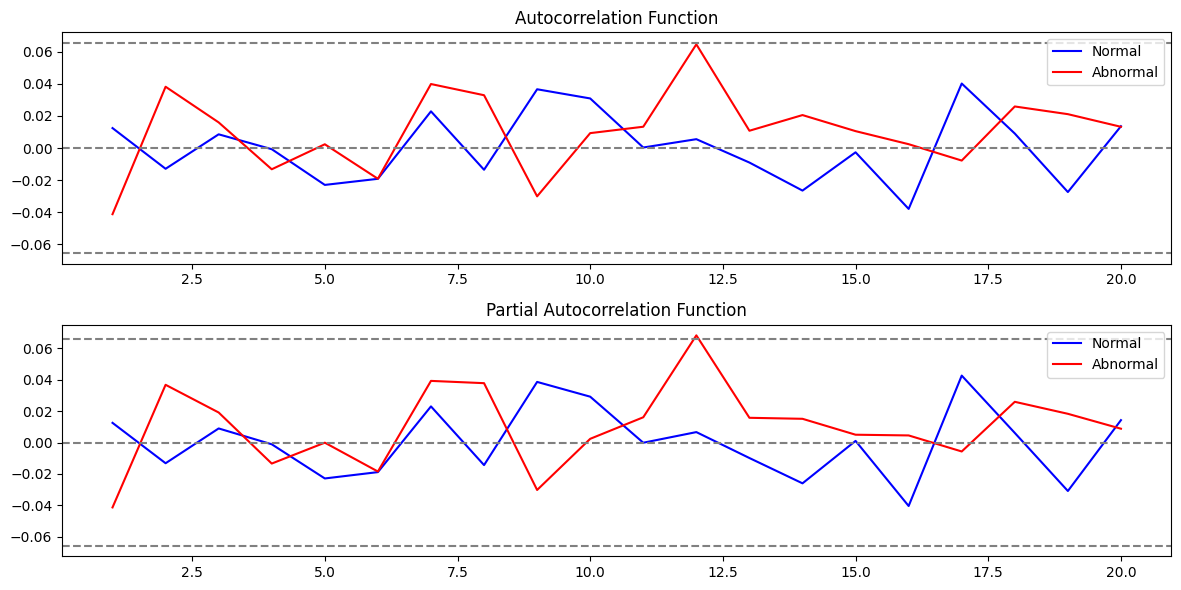

In [ ]:
# Assuming data_normal and data_abnormal have been prepared as before
# Calculate ACF and PACF

lag_acf_abnormal = acf(data_abnormal['value'], nlags=20)[1:]  # Exclude lag-0
lag_pacf_abnormal = pacf(data_abnormal['value'], nlags=20, method='ols')[1:]  # Exclude lag-0

lags = range(1, 21)  # Adjust lags to start from 1

# Plot ACF for normal and abnormal data
plt.figure(figsize=(12, 6))

plt.subplot(211)
plt.plot(lags, lag_acf_normal, label='Normal', color='blue')
plt.plot(lags, lag_acf_abnormal, label='Abnormal', color='red')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_normal)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_normal)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.legend()

# Plot PACF for normal and abnormal data
plt.subplot(212)
plt.plot(lags, lag_pacf_normal, label='Normal', color='blue')
plt.plot(lags, lag_pacf_abnormal, label='Abnormal', color='red')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_normal)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_normal)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.legend()

plt.tight_layout()
plt.show()


**What is a Lagged Version?**

A lagged version of a time series is a shifted version of the original series.

**Why It Helps Identify Patterns and Seasonality**

**Autocorrelation:**

Measures how current values of the series are related to past values (lags).
High autocorrelation at specific lags indicates repeating patterns, suggesting seasonality or cycles.

**Identifying Patterns:**

If autocorrelation remains high at regular intervals, it indicates periodic behavior.
For example, high autocorrelation at lag-12 in monthly sales data might indicate yearly seasonality.

**Identifying Seasonality:**

Regular peaks in the autocorrelation function suggest a seasonal effect.
This helps in forecasting by incorporating seasonal components into the model.


**Autocorrelation Function (ACF):**

Calculates the correlation of the time series with its own lagged values.
Helps identify how the values of the time series are related to their past values.

**Partial Autocorrelation Function (PACF):**

Calculates the correlation of the time series with its lagged values, removing the influence of the intermediate lags.
Helps identify the direct impact of a particular lag.

*Results Interpretation*
* **ACF:**

Both normal and abnormal ECG signals show low autocorrelation after lag-1, indicating that the signals do not strongly depend on their past values beyond the immediate previous value.
The autocorrelation at lag-1 is slightly higher, suggesting some immediate past influence.

* **PACF:**

The PACF plot shows similar low values for both normal and abnormal signals, confirming the weak influence of lags beyond the first one.
The values hover around zero, indicating that the current value is not significantly influenced by values beyond the immediate past.


**Conclusion**

The results suggest that both normal and abnormal ECG signals have weak dependencies on past values beyond the immediate previous value. This information can be useful for building time series models and understanding the underlying structure of the ECG signals.

# Modeling

## CCN + LSTM AutoEncoder Theory


---



**Explanation**

* Data Preprocessing: Load and normalize the data, then split it into training and testing sets.
* CNN Feature Extraction: Extract spatial features using a CNN.
* LSTM Autoencoder: Train an LSTM Autoencoder on the CNN features.
* Reconstruction Error: Calculate reconstruction errors for the test set.
* Precision-Recall Curve: Compute precision and recall at various thresholds and plot the Precision-Recall curve.
* AUPRC: Calculate the area under the Precision-Recall curve to evaluate the model's performance on imbalanced data.


---



**Area Under Precision-Recall Curve (AUPRC)**

* The Area Under Precision-Recall Curve (AUPRC) is an excellent metric for evaluating models on imbalanced datasets. It provides insights into the trade-off between precision and recall at various thresholds.

**Why AUPRC is Useful for Imbalanced Data**

* Precision-Recall Focus: It focuses on the performance of the positive class (often the minority class in imbalanced datasets).

* Robustness: AUPRC is more informative than AUC-ROC when dealing with imbalanced classes as it does not get influenced by the high number of true negatives.


---



**1. Reconstruction Accuracy:**
Objective: The goal of the autoencoder is to minimize the difference between the input and the reconstructed output.
MSE: Measures the average squared difference between the original and reconstructed data points, penalizing larger errors more heavily.

**2. Anomaly Detection:**
Error Metric: MSE provides a clear quantification of reconstruction error, which is used to identify anomalies.
Thresholding: Higher reconstruction errors indicate potential anomalies.


---



**Mean Squared Error (MSE):**
Definition: Measures the average squared difference between actual and predicted values.

**Use in Autoencoders:**
Used to minimize reconstruction error in autoencoders.
Suitability: Appropriate for evaluating the accuracy of reconstruction tasks.


---



**Convolutional Neural Networks (CNNs)**

CNNs are specialized deep learning models designed to process and analyze grid-like data structures such as images and time series. They are highly effective at capturing spatial hierarchies by applying convolution operations and pooling layers. CNNs can automatically learn spatial features through convolutional layers, which consist of filters that slide over the input data to extract meaningful features.


---



**Recurrent Neural Networks (RNNs)**
Recurrent Neural Networks (RNNs) are a class of neural networks designed to recognize patterns in sequences of data, such as time series, speech, text, or video. They are particularly powerful for tasks where context or the order of data points is crucial.

**Key Concepts:**
Recurrent Connections:

Unlike feedforward neural networks, RNNs have connections that form directed cycles.
This allows them to maintain a hidden state that captures information from previous time steps.

**Hidden State:**

The hidden state is updated at each time step based on the input and the previous hidden state.
This mechanism enables RNNs to remember information over time, making them suitable for sequential data.

**Backpropagation Through Time (BPTT):**

The training of RNNs involves backpropagation through time, where gradients are calculated for each time step to update the network's weights.


---



**Long Short-Term Memory Networks (LSTMs)**
LSTMs are a type of recurrent neural network (RNN) designed to handle sequential data and capture long-term dependencies. They use memory cells and gating mechanisms (input, output, and forget gates) to manage the flow of information, allowing the model to retain important information over long sequences and mitigate the vanishing gradient problem common in standard RNNs.

Variants to Address RNN Challenges:

**Long Short-Term Memory (LSTM):**

LSTM networks include memory cells and gating mechanisms (input, forget, and output gates) to control the flow of information.
These gates help retain important information over long periods and mitigate the vanishing gradient problem.

**Gated Recurrent Unit (GRU):**

GRUs are similar to LSTMs but with a simpler architecture (fewer gates).
They also help in retaining long-term dependencies and are computationally more efficient than LSTMs.


---



**Autoencoders**
-> **Deep fake**

Autoencoders are unsupervised neural networks designed for learning efficient codings of input data. They consist of an encoder that compresses the input into a lower-dimensional representation and a decoder that reconstructs the input from this representation. The objective is to minimize the reconstruction error, making them useful for tasks such as anomaly detection, noise reduction, and dimensionality reduction.



**LSTM Autoencoders**

LSTM Autoencoders combine the principles of autoencoders and LSTMs to handle sequential data. The architecture consists of an LSTM encoder that compresses the sequence into a fixed-size context vector and an LSTM decoder that reconstructs the original sequence from this vector. This model is particularly effective for sequential anomaly detection, as it can learn and reconstruct complex temporal patterns.

**Why Use CNN + LSTM Autoencoder Architecture?**
The combined architecture leverages the strengths of both CNNs and LSTMs to capture both spatial and temporal features effectively:

* CNN: Extracts local spatial features from the raw ECG signals, capturing important patterns and details.
* LSTM Autoencoder: Processes the extracted features to learn temporal dependencies and reconstruct the sequence, making it effective for anomaly detection.


---



**Explanation of CNN Architecture Choices**
The CNN architecture was chosen to effectively extract spatial features from the ECG time series data. Here’s a detailed explanation of each component:

**Conv1D Layer:**

Purpose: Extract local spatial features by applying convolution operations along the time axis.
Filters: 64 filters are used to capture various patterns in the ECG signal.
Kernel Size: A kernel size of 3 is chosen to focus on small, local patterns.

**MaxPooling1D Layer:**

Purpose: Downsample the input representation, reducing its dimensionality and computational complexity.
Pool Size: Pool size of 2 reduces the dimensionality by half, retaining the most significant features.

**Flatten Layer:**

Purpose: Convert the 2D matrix output from the previous layers into a 1D vector.
Reason: The 1D vector is suitable for feeding into the LSTM autoencoder for further processing.


---



* First LSTM Layer:
Purpose: This layer processes the input sequence and outputs another sequence of the same length.
Units (128): The number of LSTM units. More units can capture more complex patterns.
Activation ('relu'): The activation function used within each LSTM cell. ReLU helps in faster training and mitigating vanishing gradient problems.
Input Shape: Defined by timesteps and the number of features from the CNN output.
Return Sequences (True): Indicates that this layer returns the full sequence of outputs for each input timestep, which is necessary for the next LSTM layer.

* Second LSTM Layer:
Purpose: Further processes the output from the previous LSTM layer.
Units (64): Reducing the number of units helps in capturing more condensed representations.
Return Sequences (False): This layer outputs only the last hidden state, which acts as a summary of the entire input sequence. This is useful for feeding into the RepeatVector layer.

* RepeatVector Layer:
Purpose: Repeats the input provided (the last hidden state of the previous LSTM) timesteps times.
Function: This layer is essential to match the input shape required by the subsequent LSTM layers, effectively preparing the data for the decoding phase.

* Third LSTM Layer:
Purpose: Starts the decoding process by generating sequences from the repeated context vector.
Units (64): Matches the second LSTM layer to maintain consistency in decoding.
Return Sequences (True): Outputs the full sequence needed by the next LSTM layer in the decoding stack.

* Fourth LSTM Layer:
Purpose: Further decodes the sequence generated by the third LSTM layer.
Units (128): Matches the first LSTM layer, completing the symmetry of the autoencoder architecture.
Return Sequences (True): Outputs the full sequence required by the final TimeDistributed layer.

* TimeDistributed Dense Layer:
Purpose: Applies a fully connected dense layer to each timestep in the sequence independently.
Units: Equal to the number of features in the CNN output, ensuring the output shape matches the input shape.
Function: Reconstructs the original input sequence from the encoded representation, completing the autoencoder.

---

**Why This Architecture?**

* **Hierarchical Feature Learning:** The initial LSTM layers learn to capture complex temporal dependencies from the CNN-extracted features.
* **Dimensionality Reduction and Bottleneck:** The second LSTM layer reduces the dimensionality, forcing the network to learn a compressed representation of the input sequence.
* **Reconstruction: **The RepeatVector and subsequent LSTM layers decode this compressed representation back into the original sequence.
* **Sequence to Sequence Learning:** The architecture allows for effective sequence-to-sequence learning, which is essential for time series data like ECG signals.

---

**MinMaxScaler**

Definition: Scales the data to a fixed range, usually [0, 1].

Use Case: Best when the features have varying scales and when the data distribution is not Gaussian.

Effect: Each feature will be scaled to the specified range, preserving the relative differences in magnitude.

---

**Which to Choose for ECG Data?**

ECG Data Characteristics:
ECG data can have varying scales and might not follow a Gaussian distribution.

**MinMaxScaler** is generally preferred for neural network models, especially when using activation functions like ReLU, which benefit from input values in the [0, 1] range.

**Anomaly Detection Metrics**
For anomaly detection, using classification metrics like Precision-Recall Curve and AUPRC is indeed appropriate and commonly done. Here’s why:

**Precision-Recall Curve and AUPRC**
**Precision-Recall Curve:**

**Precision: **The proportion of true positive detections among all positive detections.
**Recall (Sensitivity):** The proportion of true positive detections among all actual positives.
**Usefulness:** Particularly informative when dealing with imbalanced datasets, like anomaly detection, where anomalies (positives) are rare compared to normal cases (negatives).

**Area Under Precision-Recall Curve (AUPRC):**

**Definition:** Summarizes the trade-off between precision and recall across different thresholds.

**Relevance:** More appropriate than AUC-ROC in imbalanced scenarios because it focuses on the minority class.

**Anomaly Detection as Classification**
Binary Classification: Anomaly detection can be framed as a binary classification problem where the task is to distinguish between normal (negative class) and anomalous (positive class) instances.

**Reconstruction Error:** In autoencoders, the reconstruction error is used to classify instances. A higher reconstruction error indicates an anomaly.

**Parameters in Your Specific Model**
* CNN for Feature Extraction
  - Conv1D Layer: Parameters include the weights of the convolutional filters and biases.

* LSTM Autoencoder
  - LSTM Layers: Parameters include the weights and biases for the input, forget, and output gates.

  - TimeDistributed Dense Layer: Parameters include the weights and biases connecting each input neuron to the output neurons.

## **1. Isolation Forest - Complete Pipeline**

AUPRC on the test set: 0.884


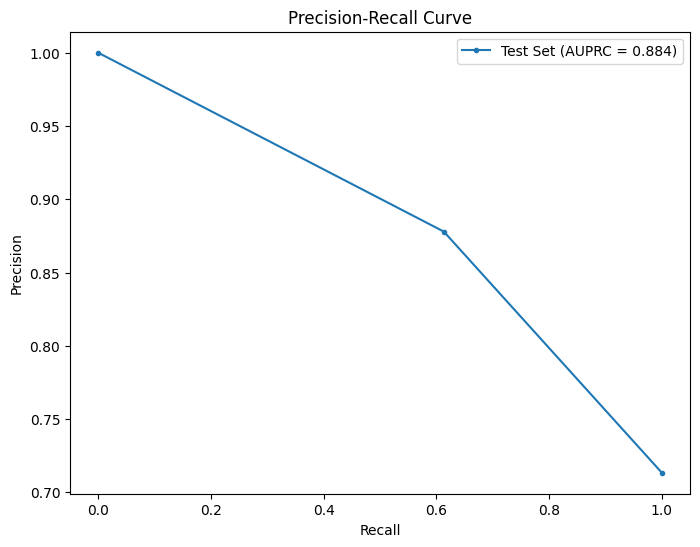

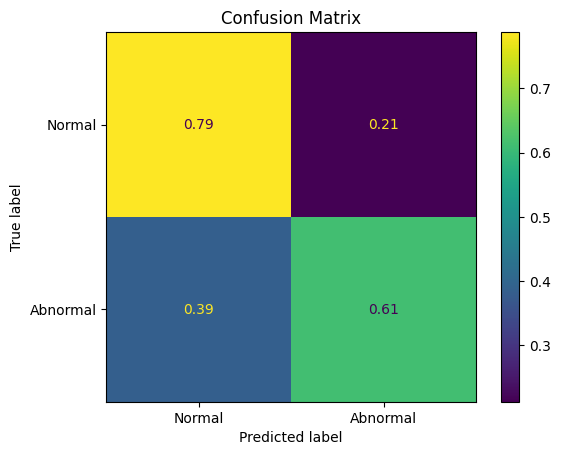

In [ ]:
# Load Data
data_normal = pd.read_csv(mypath + 'ptbdb_normal.csv')
data_abnormal = pd.read_csv(mypath + 'ptbdb_abnormal.csv')

# Remove the last column before concatenating
data_normal = data_normal.iloc[:, :-1]
data_abnormal = data_abnormal.iloc[:, :-1]

# Reset column names to ensure they are the same
data_normal.columns = [f'feature_{i}' for i in range(data_normal.shape[1])]
data_abnormal.columns = [f'feature_{i}' for i in range(data_abnormal.shape[1])]

# Add the label column
data_normal['label'] = 0
data_abnormal['label'] = 1

# Concatenate the dataframes along rows
data = pd.concat([data_normal, data_abnormal], axis=0).reset_index(drop=True)

# Separate labels before handling NaNs
labels = data['label'].values
data = data.drop('label', axis=1)

# Handling NaN values: Replace zeros with NaNs, then forward fill and backward fill
data = data.replace(0, np.nan)  # Assuming zeros are padding
data = data.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill

# Drop columns with all NaN values after filling
data = data.dropna(axis=1, how='all')

# Reattach labels
data['label'] = labels

# Ensure there is no empty data after handling NaNs
if data.empty:
    raise ValueError("Dataframe is empty after handling NaN values")

labels = data['label'].values
data = data.drop('label', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size=0.2,
                                                    random_state=42)

# Scale the data after splitting
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.5,
                             random_state=42)
iso_forest.fit(X_train)

# Predict anomalies in the test set
y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)

# Convert predictions: -1 for anomaly, 1 for normal
y_pred_train = np.where(y_pred_train == -1, 1, 0)
y_pred_test = np.where(y_pred_test == -1, 1, 0)

# Precision-Recall curve and AUPRC for test set
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test)
auprc_test = auc(recall, precision)
print(f'AUPRC on the test set: {auprc_test:.3f}')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Test Set (AUPRC = {auprc_test:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()


AUPRC on the test set: 0.660


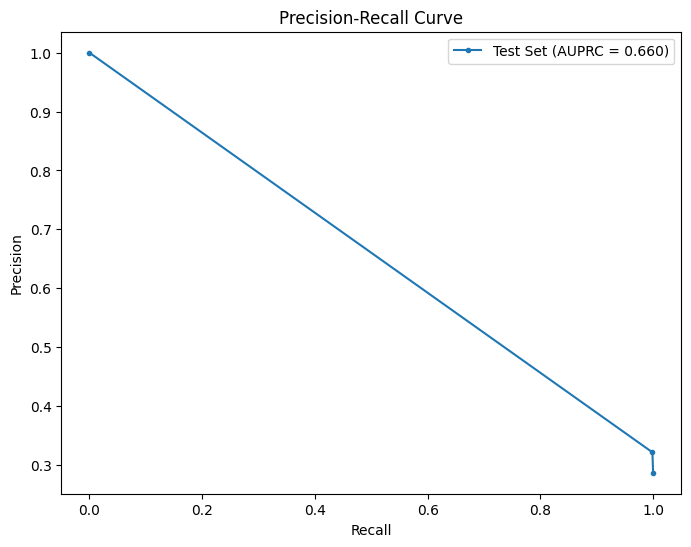

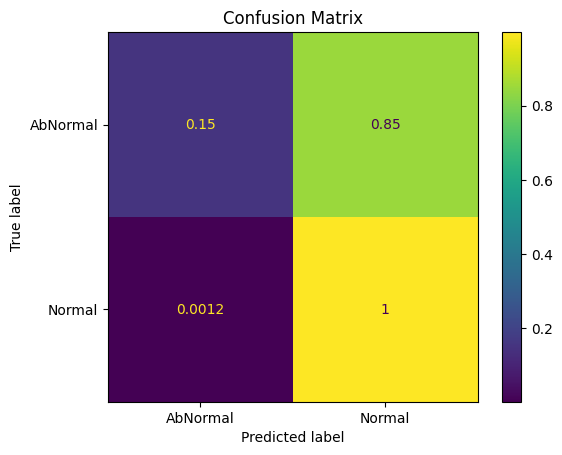

In [ ]:
data_normal = pd.read_csv(mypath + 'ptbdb_normal.csv')
data_abnormal = pd.read_csv(mypath + 'ptbdb_abnormal.csv')

# Remove the last column before concatenating
data_normal = data_normal.iloc[:, :-1]
data_abnormal = data_abnormal.iloc[:, :-1]

# Reset column names to ensure they are the same
data_normal.columns = [f'feature_{i}' for i in range(data_normal.shape[1])]
data_abnormal.columns = [f'feature_{i}' for i in range(data_abnormal.shape[1])]

# Add the label column
data_normal['label'] = 1
data_abnormal['label'] = 0

# Concatenate the dataframes along rows
data = pd.concat([data_normal, data_abnormal], axis=0).reset_index(drop=True)

# Separate labels before handling NaNs
labels = data['label'].values
data = data.drop('label', axis=1)

# Handling NaN values: Replace zeros with NaNs, then forward fill and backward fill
data = data.replace(0, np.nan)  # Assuming zeros are padding
data = data.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill

# Drop columns with all NaN values after filling
data = data.dropna(axis=1, how='all')

# Reattach labels
data['label'] = labels

# Ensure there is no empty data after handling NaNs
if data.empty:
    raise ValueError("Dataframe is empty after handling NaN values")

labels = data['label'].values
data = data.drop('label', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Scale the data after splitting
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.1,
                             random_state=42)
iso_forest.fit(X_train)

# Predict anomalies in the test set
y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)

# Convert predictions: -1 for anomaly, 1 for normal
y_pred_train = np.where(y_pred_train == -1, 0, 1)
y_pred_test = np.where(y_pred_test == -1, 0, 1)

# Precision-Recall curve and AUPRC for test set
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test)
auprc_test = auc(recall, precision)
print(f'AUPRC on the test set: {auprc_test:.3f}')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Test Set (AUPRC = {auprc_test:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AbNormal', 'Normal'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()


## **2. Autoencoder**

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                11968     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dense_15 (Dense)            (None, 186)               12090     
                                                                 
Total params: 28250 (110.35 KB)
Trainable params: 28250 (110.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
91/91 [==============================] - 1s 4ms/step
AUPRC on the test set: 0.876


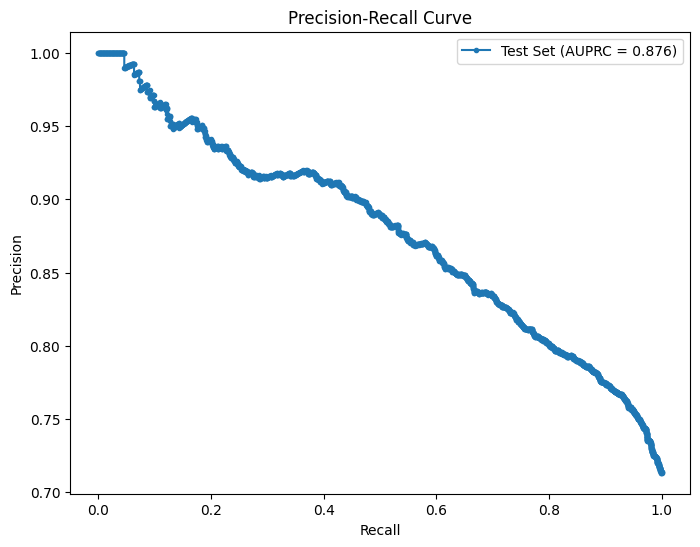

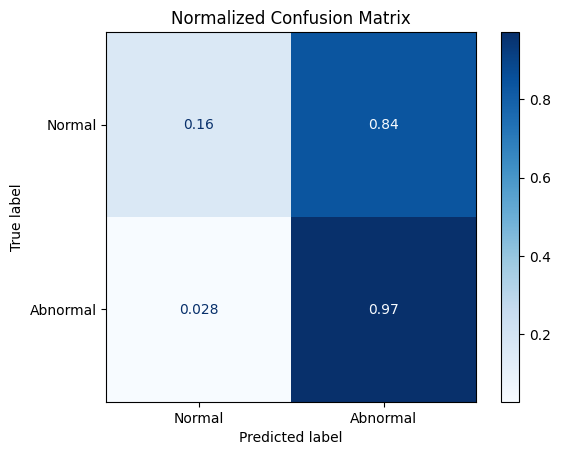

In [ ]:
data_normal = pd.read_csv(mypath + 'ptbdb_normal.csv')
data_abnormal = pd.read_csv(mypath + 'ptbdb_abnormal.csv')

# Remove the last column before concatenating
data_normal = data_normal.iloc[:, :-1]
data_abnormal = data_abnormal.iloc[:, :-1]

# Reset column names to ensure they are the same
data_normal.columns = [f'feature_{i}' for i in range(data_normal.shape[1])]
data_abnormal.columns = [f'feature_{i}' for i in range(data_abnormal.shape[1])]

# Add the label column
data_normal['label'] = 0
data_abnormal['label'] = 1

# Concatenate the dataframes along rows
data = pd.concat([data_normal, data_abnormal], axis=0).reset_index(drop=True)

# Separate labels before handling NaNs
labels = data['label'].values
data = data.drop('label', axis=1)

# Handling NaN values: Replace zeros with NaNs, then forward fill and backward fill
data = data.replace(0, np.nan)  # Assuming zeros are padding
data = data.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill

# Drop columns with all NaN values after filling
data = data.dropna(axis=1, how='all')

# Reattach labels
data['label'] = labels

# Ensure there is no empty data after handling NaNs
if data.empty:
    raise ValueError("Dataframe is empty after handling NaN values")

labels = data['label'].values
data = data.drop('label', axis=1)

# Scale the data after splitting
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Add labels back to scaled data
data_scaled = pd.DataFrame(data_scaled, columns=[f'feature_{i}' for i in range(data.shape[1])])
data_scaled['label'] = labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled.drop('label', axis=1), data_scaled['label'], test_size=0.2, random_state=42)

# Build Autoencoder
autoencoder = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(X_train.shape[1], activation='sigmoid')
])
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

# Train the Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32,
                validation_split=0.2,
                verbose=0)

# Evaluate on the final test set
reconstructions = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(reconstructions - X_test), axis=1)

# Precision-Recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, reconstruction_error)
auprc_test = auc(recall, precision)
print(f'AUPRC on the test set: {auprc_test:.3f}')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Test Set (AUPRC = {auprc_test:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix using the best threshold
best_threshold = thresholds[np.argmax(precision * recall)]
y_pred = (reconstruction_error > best_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.show()


### 2.1 Threshhold Approach 1

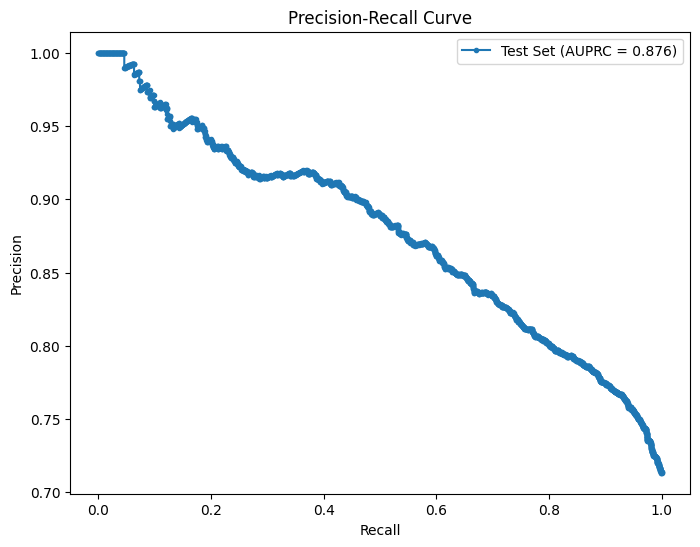

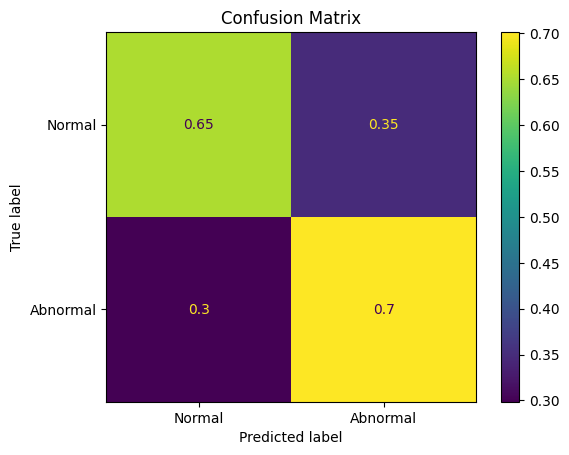

In [ ]:
best_threshold = np.percentile(reconstruction_error, 40)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Test Set (AUPRC = {auprc_test:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix using the best threshold
y_pred = (reconstruction_error > best_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

## **3. LSTM AutoEncoder**

### 3.1 Loss Function MSE

Class weights: {0: 1.8125194643413267, 1: 0.690473365761063}
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 10, 128)           75264     
                                                                 
 lstm_37 (LSTM)              (None, 64)                49408     
                                                                 
 repeat_vector_9 (RepeatVec  (None, 10, 64)            0         
 tor)                                                            
                                                                 
 lstm_38 (LSTM)              (None, 10, 64)            33024     
                                                                 
 lstm_39 (LSTM)              (None, 10, 128)           98816     
                                                                 
 time_distributed_9 (TimeDi  (None, 10, 18)            232

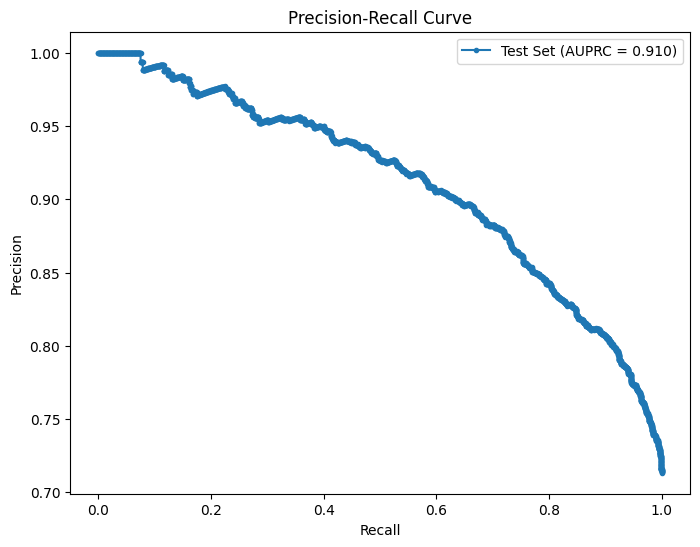

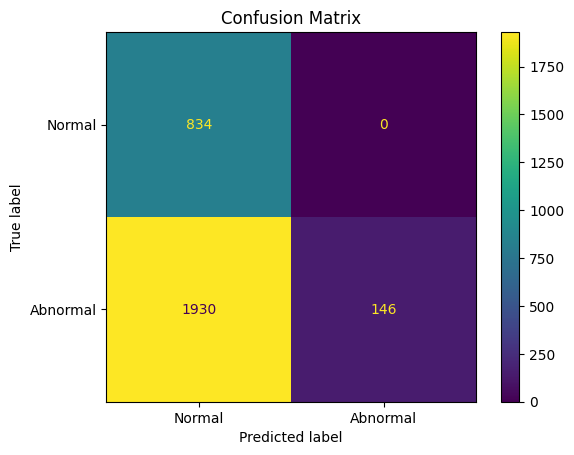

In [ ]:
data_normal = pd.read_csv(mypath + 'ptbdb_normal.csv')
data_abnormal = pd.read_csv(mypath + 'ptbdb_abnormal.csv')

# Remove the last column before concatenating
data_normal = data_normal.iloc[:, :-1]
data_abnormal = data_abnormal.iloc[:, :-1]

# Reset column names to ensure they are the same
data_normal.columns = [f'feature_{i}' for i in range(data_normal.shape[1])]
data_abnormal.columns = [f'feature_{i}' for i in range(data_abnormal.shape[1])]

# Add the label column
data_normal['label'] = 0
data_abnormal['label'] = 1

# Concatenate the dataframes along rows
data = pd.concat([data_normal, data_abnormal], axis=0).reset_index(drop=True)

# Separate labels before handling NaNs
labels = data['label'].values
data = data.drop('label', axis=1)

# Handling NaN values: Replace zeros with NaNs, then forward fill and backward fill
data = data.replace(0, np.nan)  # Assuming zeros are padding
data = data.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill

# Drop columns with all NaN values after filling
data = data.dropna(axis=1, how='all')

# Reattach labels
data['label'] = labels

# Ensure there is no empty data after handling NaNs
if data.empty:
    raise ValueError("Dataframe is empty after handling NaN values")

labels = data['label'].values
data = data.drop('label', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Print class weights
print(f"Class weights: {class_weight_dict}")

# Scale the data after splitting
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Increase the number of timesteps for the input
timesteps = 10  # Adjust this value to see its effect
n_features = X_train.shape[1] // timesteps
X_train = X_train[:, :n_features * timesteps]
X_train = X_train.reshape((X_train.shape[0], timesteps, n_features))
X_test = X_test[:, :n_features * timesteps]
X_test = X_test.reshape((X_test.shape[0], timesteps, n_features))

# Build LSTM Autoencoder
lstm_autoencoder = Sequential([
    LSTM(128, activation='relu', input_shape=(timesteps, n_features), return_sequences=True),
    LSTM(64, activation='relu', return_sequences=False),
    RepeatVector(timesteps),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(n_features))
])
lstm_autoencoder.compile(optimizer='adam', loss='mse')
lstm_autoencoder.summary()

# Train the LSTM Autoencoder with class weights
lstm_autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate on the final test set
reconstructions = lstm_autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(reconstructions - X_test), axis=2).mean(axis=1)

# Precision-Recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, reconstruction_error)
auprc_test = auc(recall, precision)
print(f'AUPRC on the test set: {auprc_test:.3f}')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Test Set (AUPRC = {auprc_test:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix
threshold = np.percentile(reconstruction_error, 95)  # Example threshold
y_pred = (reconstruction_error > threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Print class weights
print(f"Class weights: {class_weight_dict}")

Class weights: {0: 1.8125194643413267, 1: 0.690473365761063}


### 3.2 Loss Function MAE

* MAE is less sensitive to outliers compared to Mean Squared Error (MSE).
It is a good alternative for reconstruction tasks.

Class weights: {0: 1.8125194643413267, 1: 0.690473365761063}
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 10, 128)           75264     
                                                                 
 lstm_45 (LSTM)              (None, 64)                49408     
                                                                 
 repeat_vector_11 (RepeatVe  (None, 10, 64)            0         
 ctor)                                                           
                                                                 
 lstm_46 (LSTM)              (None, 10, 64)            33024     
                                                                 
 lstm_47 (LSTM)              (None, 10, 128)           98816     
                                                                 
 time_distributed_11 (TimeD  (None, 10, 18)            232

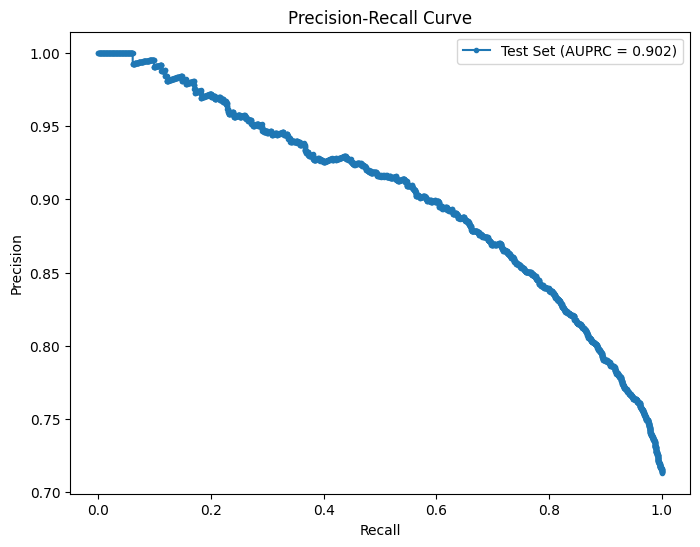

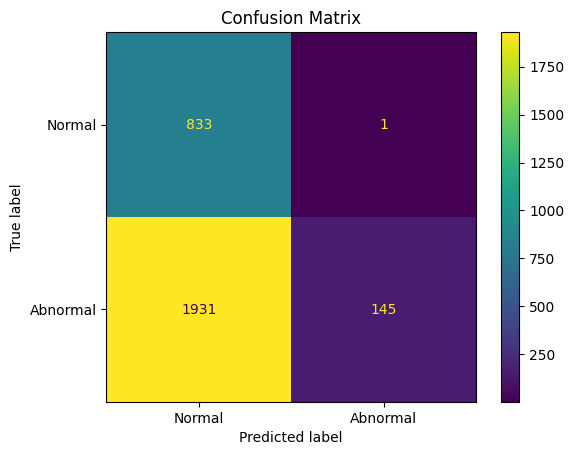

In [ ]:
data_normal = pd.read_csv(mypath + 'ptbdb_normal.csv')
data_abnormal = pd.read_csv(mypath + 'ptbdb_abnormal.csv')

# Remove the last column before concatenating
data_normal = data_normal.iloc[:, :-1]
data_abnormal = data_abnormal.iloc[:, :-1]

# Reset column names to ensure they are the same
data_normal.columns = [f'feature_{i}' for i in range(data_normal.shape[1])]
data_abnormal.columns = [f'feature_{i}' for i in range(data_abnormal.shape[1])]

# Add the label column
data_normal['label'] = 0
data_abnormal['label'] = 1

# Concatenate the dataframes along rows
data = pd.concat([data_normal, data_abnormal], axis=0).reset_index(drop=True)

# Separate labels before handling NaNs
labels = data['label'].values
data = data.drop('label', axis=1)

# Handling NaN values: Replace zeros with NaNs, then forward fill and backward fill
data = data.replace(0, np.nan)  # Assuming zeros are padding
data = data.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill

# Drop columns with all NaN values after filling
data = data.dropna(axis=1, how='all')

# Reattach labels
data['label'] = labels

# Ensure there is no empty data after handling NaNs
if data.empty:
    raise ValueError("Dataframe is empty after handling NaN values")

labels = data['label'].values
data = data.drop('label', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Scale the data after splitting
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Increase the number of timesteps for the input
timesteps = 10  # Adjust this value to see its effect
n_features = X_train.shape[1] // timesteps
X_train = X_train[:, :n_features * timesteps]
X_train = X_train.reshape((X_train.shape[0], timesteps, n_features))
X_test = X_test[:, :n_features * timesteps]
X_test = X_test.reshape((X_test.shape[0], timesteps, n_features))

# Build LSTM Autoencoder
lstm_autoencoder = Sequential([
    LSTM(128, activation='relu', input_shape=(timesteps, n_features), return_sequences=True),
    LSTM(64, activation='relu', return_sequences=False),
    RepeatVector(timesteps),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(n_features))
])
lstm_autoencoder.compile(optimizer='adam', loss='mae')
lstm_autoencoder.summary()

# Train the LSTM Autoencoder
lstm_autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate on the final test set
reconstructions = lstm_autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(reconstructions - X_test), axis=2).mean(axis=1)

# Precision-Recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, reconstruction_error)
auprc_test = auc(recall, precision)
print(f'AUPRC on the test set: {auprc_test:.3f}')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Test Set (AUPRC = {auprc_test:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix
threshold = np.percentile(reconstruction_error, 95)  # Example threshold
y_pred = (reconstruction_error > threshold).astype(int)
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()


### 3.3 Threshhold Approach 1

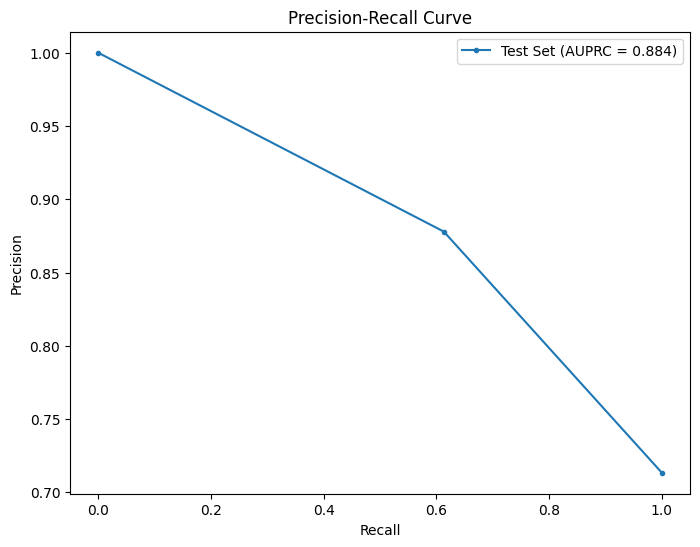

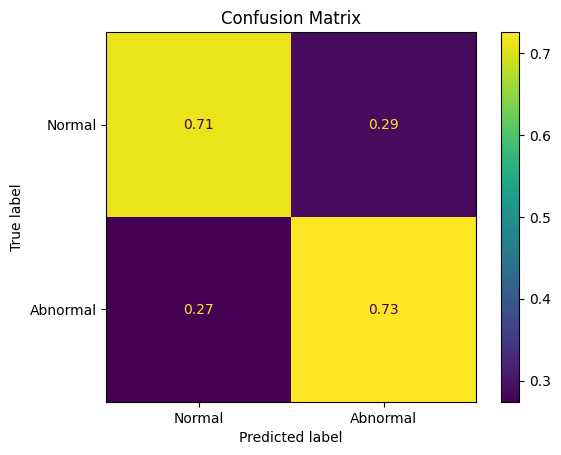

In [ ]:
best_threshold = np.percentile(reconstruction_error, 40)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Test Set (AUPRC = {auprc_test:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix using the best threshold
y_pred = (reconstruction_error > best_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()


### 3.4 Threshhold Approach 2

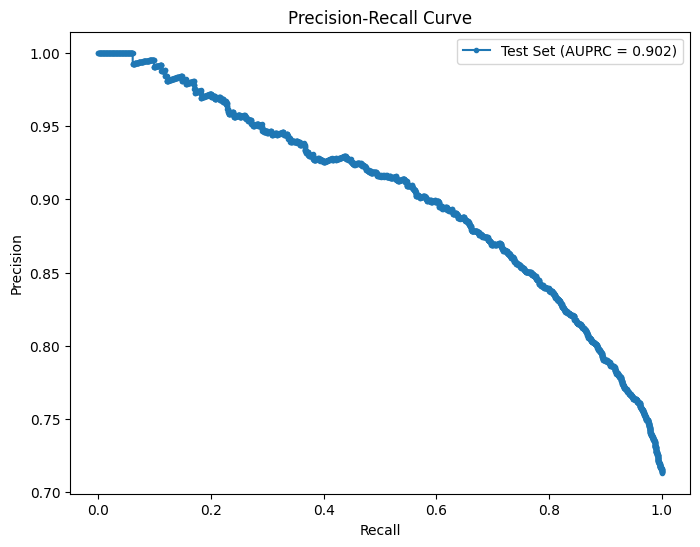

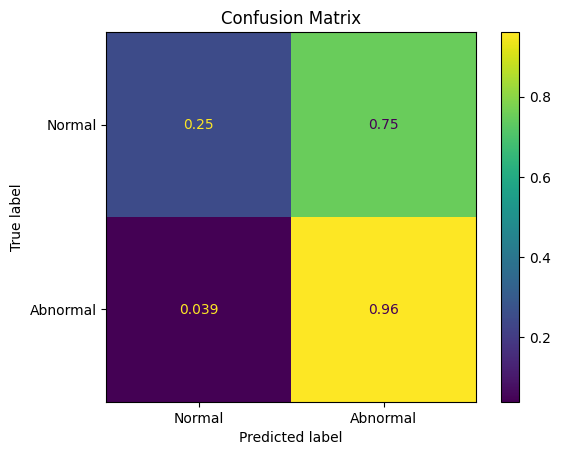

In [ ]:
# Find the best threshold based on the Precision-Recall curve
best_threshold = thresholds[np.argmax(precision * recall)]

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Test Set (AUPRC = {auprc_test:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix using the best threshold
y_pred = (reconstruction_error > best_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
data_normal = pd.read_csv(mypath + 'ptbdb_normal.csv')
data_abnormal = pd.read_csv(mypath + 'ptbdb_abnormal.csv')

# Remove the last column before concatenating
data_normal = data_normal.iloc[:, :-1]
data_abnormal = data_abnormal.iloc[:, :-1]

# Reset column names to ensure they are the same
data_normal.columns = [f'feature_{i}' for i in range(data_normal.shape[1])]
data_abnormal.columns = [f'feature_{i}' for i in range(data_abnormal.shape[1])]

# Add the label column
data_normal['label'] = 0
data_abnormal['label'] = 1

# Concatenate the dataframes along rows
data = pd.concat([data_normal, data_abnormal], axis=0).reset_index(drop=True)

# Separate labels before handling NaNs
labels = data['label'].values
data = data.drop('label', axis=1)

# Handling NaN values: Replace zeros with NaNs, then forward fill and backward fill
data = data.replace(0, np.nan)  # Assuming zeros are padding
data = data.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill

# Drop columns with all NaN values after filling
data = data.dropna(axis=1, how='all')

# Reattach labels
data['label'] = labels

# Ensure there is no empty data after handling NaNs
if data.empty:
    raise ValueError("Dataframe is empty after handling NaN values")

labels = data['label'].values
data = data.drop('label', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Print class weights
print(f"Class weights: {class_weight_dict}")

# Scale the data after splitting
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Increase the number of timesteps for the input
timesteps = 10  # Adjust this value to see its effect
n_features = X_train.shape[1] // timesteps
X_train = X_train[:, :n_features * timesteps]
X_train = X_train.reshape((X_train.shape[0], timesteps, n_features))
X_test = X_test[:, :n_features * timesteps]
X_test = X_test.reshape((X_test.shape[0], timesteps, n_features))

# Build LSTM Autoencoder
lstm_autoencoder = Sequential([
    LSTM(128, activation='relu', input_shape=(timesteps, n_features), return_sequences=True),
    LSTM(64, activation='relu', return_sequences=False),
    RepeatVector(timesteps),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(n_features))
])
lstm_autoencoder.compile(optimizer='adam', loss='mae')
lstm_autoencoder.summary()

# Train the LSTM Autoencoder with class weights
lstm_autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate on the final test set
reconstructions = lstm_autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(reconstructions - X_test), axis=2).mean(axis=1)

# Precision-Recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, reconstruction_error)
auprc_test = auc(recall, precision)
print(f'AUPRC on the test set: {auprc_test:.3f}')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Test Set (AUPRC = {auprc_test:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix
threshold = np.percentile(reconstruction_error, 95)  # Example threshold
y_pred = (reconstruction_error > threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()


## **4. LSTM AutoEncoder + CNN Feature Extraction**

91/91 [==============================] - 0s 2ms/step
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 1, 128)            524800    
                                                                 
 lstm_49 (LSTM)              (None, 64)                49408     
                                                                 
 repeat_vector_12 (RepeatVe  (None, 1, 64)             0         
 ctor)                                                           
                                                                 
 lstm_50 (LSTM)              (None, 1, 64)             33024     
                                                                 
 lstm_51 (LSTM)              (None, 1, 128)            98816     
                                                                 
 time_distributed_12 (TimeD  (None, 1, 896)            115584    


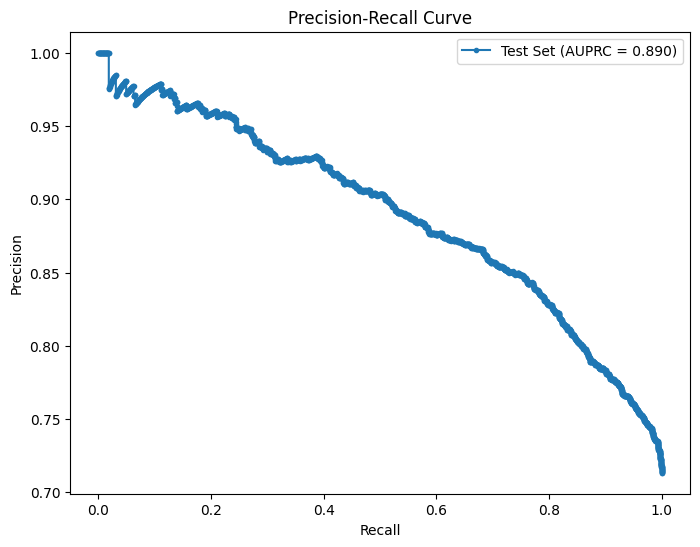

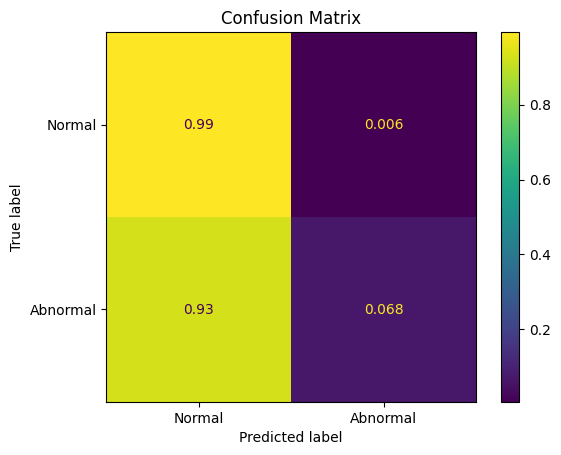

In [ ]:
data_normal = pd.read_csv(mypath + 'ptbdb_normal.csv')
data_abnormal = pd.read_csv(mypath + 'ptbdb_abnormal.csv')

# Remove the last column before concatenating
data_normal = data_normal.iloc[:, :-1]
data_abnormal = data_abnormal.iloc[:, :-1]

# Reset column names to ensure they are the same
data_normal.columns = [f'feature_{i}' for i in range(data_normal.shape[1])]
data_abnormal.columns = [f'feature_{i}' for i in range(data_abnormal.shape[1])]

# Add the label column
data_normal['label'] = 0
data_abnormal['label'] = 1

# Concatenate the dataframes along rows
data = pd.concat([data_normal, data_abnormal], axis=0).reset_index(drop=True)

# Separate labels before handling NaNs
labels = data['label'].values
data = data.drop('label', axis=1)

# Handling NaN values: Replace zeros with NaNs, then forward fill and backward fill
data = data.replace(0, np.nan)  # Assuming zeros are padding
data = data.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill

# Drop columns with all NaN values after filling
data = data.dropna(axis=1, how='all')

# Reattach labels
data['label'] = labels

# Ensure there is no empty data after handling NaNs
if data.empty:
    raise ValueError("Dataframe is empty after handling NaN values")

labels = data['label'].values
data = data.drop('label', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Scale the data after splitting
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Increase the number of timesteps for the input
timesteps = 30
n_features = X_train.shape[1] // timesteps
X_train = X_train[:, :n_features * timesteps]
X_train = X_train.reshape((X_train.shape[0], timesteps, n_features))
X_test = X_test[:, :n_features * timesteps]
X_test = X_test.reshape((X_test.shape[0], timesteps, n_features))

# Build CNN for feature extraction
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(timesteps, n_features)),
    MaxPooling1D(pool_size=2),
    Flatten()
])
cnn_model.compile(optimizer='adam', loss='mse')

# Extract features using the CNN model
cnn_features_train = cnn_model.predict(X_train)
cnn_features_test = cnn_model.predict(X_test)

cnn_features_train = cnn_features_train.reshape((cnn_features_train.shape[0], 1, -1))
cnn_features_test = cnn_features_test.reshape((cnn_features_test.shape[0], 1, -1))

# Build LSTM Autoencoder
lstm_autoencoder = Sequential([
    LSTM(128, activation='relu', input_shape=(1, cnn_features_train.shape[2]), return_sequences=True),
    LSTM(64, activation='relu', return_sequences=False),
    RepeatVector(1),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(cnn_features_train.shape[2]))
])
lstm_autoencoder.compile(optimizer='adam', loss='mse')
lstm_autoencoder.summary()

# Train the LSTM Autoencoder
lstm_autoencoder.fit(cnn_features_train, cnn_features_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate on the test set
reconstructions = lstm_autoencoder.predict(cnn_features_test)
reconstruction_error = np.mean(np.abs(reconstructions - cnn_features_test), axis=2).flatten()

# Precision-Recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, reconstruction_error)
auprc_test = auc(recall, precision)
print(f'AUPRC on the test set: {auprc_test:.3f}')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Test Set (AUPRC = {auprc_test:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix
threshold = np.percentile(reconstruction_error, 95)  # Example threshold
y_pred = (reconstruction_error > threshold).astype(int)
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

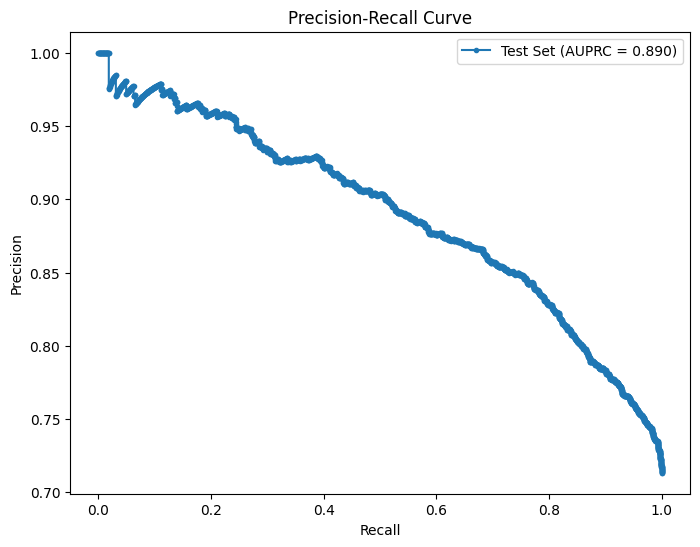

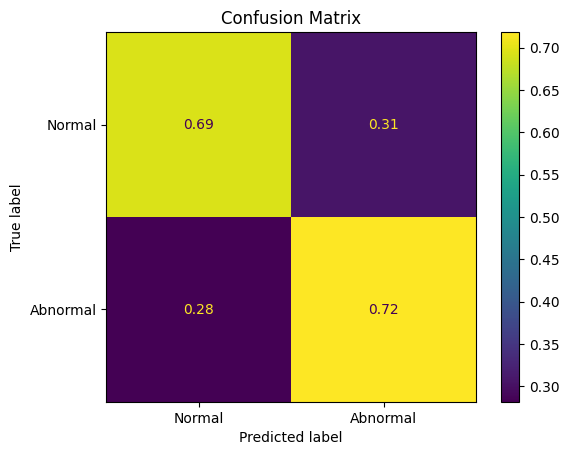

In [ ]:
best_threshold = np.percentile(reconstruction_error, 40)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Test Set (AUPRC = {auprc_test:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix using the best threshold
y_pred = (reconstruction_error > best_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()


91/91 [==============================] - 1s 5ms/step
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_120 (LSTM)             (None, 1, 128)            524800    
                                                                 
 dropout_4 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_121 (LSTM)             (None, 64)                49408     
                                                                 
 repeat_vector_30 (RepeatVe  (None, 1, 64)             0         
 ctor)                                                           
                                                                 
 lstm_122 (LSTM)             (None, 1, 64)             33024     
                                                                 
 dropout_5 (Dropout)         (None, 1, 64)             0         


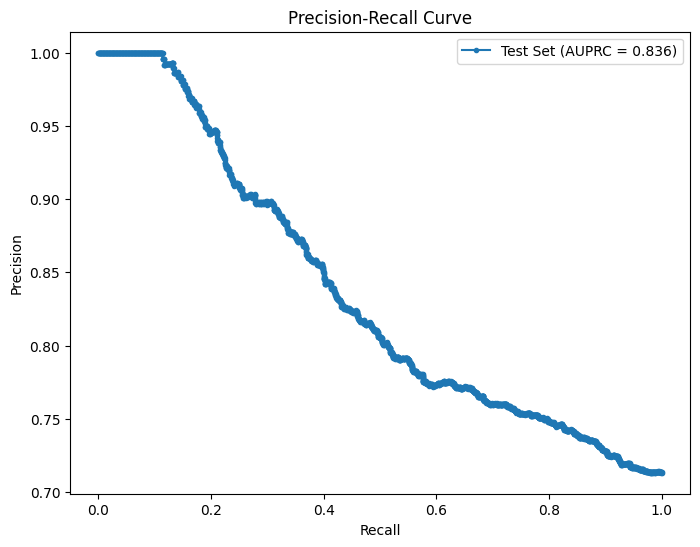

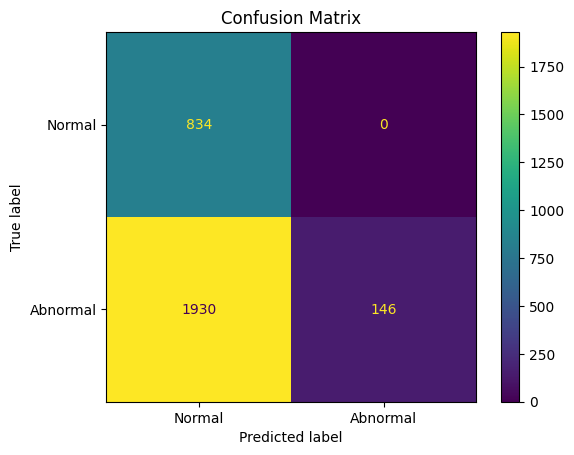

In [ ]:
data_normal = pd.read_csv(mypath + 'ptbdb_normal.csv')
data_abnormal = pd.read_csv(mypath + 'ptbdb_abnormal.csv')

# Remove the last column before concatenating
data_normal = data_normal.iloc[:, :-1]
data_abnormal = data_abnormal.iloc[:, :-1]

# Reset column names to ensure they are the same
data_normal.columns = [f'feature_{i}' for i in range(data_normal.shape[1])]
data_abnormal.columns = [f'feature_{i}' for i in range(data_abnormal.shape[1])]

# Add the label column
data_normal['label'] = 0
data_abnormal['label'] = 1

# Concatenate the dataframes along rows
data = pd.concat([data_normal, data_abnormal], axis=0).reset_index(drop=True)

# Separate labels before handling NaNs
labels = data['label'].values
data = data.drop('label', axis=1)

# Handling NaN values: Replace zeros with NaNs, then forward fill and backward fill
data = data.replace(0, np.nan)  # Assuming zeros are padding
data = data.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill

# Drop columns with all NaN values after filling
data = data.dropna(axis=1, how='all')

# Reattach labels
data['label'] = labels

# Ensure there is no empty data after handling NaNs
if data.empty:
    raise ValueError("Dataframe is empty after handling NaN values")

labels = data['label'].values
data = data.drop('label', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Scale the data after splitting
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Increase the number of timesteps for the input
timesteps = 30
n_features = X_train.shape[1] // timesteps
X_train = X_train[:, :n_features * timesteps]
X_train = X_train.reshape((X_train.shape[0], timesteps, n_features))
X_test = X_test[:, :n_features * timesteps]
X_test = X_test.reshape((X_test.shape[0], timesteps, n_features))

# Build CNN for feature extraction
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(timesteps, n_features), kernel_regularizer='l2'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten()
])
cnn_model.compile(optimizer='adam', loss='mse')

# Extract features using the CNN model
cnn_features_train = cnn_model.predict(X_train)
cnn_features_test = cnn_model.predict(X_test)

cnn_features_train = cnn_features_train.reshape((cnn_features_train.shape[0], 1, -1))
cnn_features_test = cnn_features_test.reshape((cnn_features_test.shape[0], 1, -1))

# Build LSTM Autoencoder
lstm_autoencoder = Sequential([
    LSTM(128, activation='relu', input_shape=(1, cnn_features_train.shape[2]), return_sequences=True, kernel_regularizer='l2'),
    Dropout(0.3),
    LSTM(64, activation='relu', return_sequences=False, kernel_regularizer='l2'),
    RepeatVector(1),
    LSTM(64, activation='relu', return_sequences=True, kernel_regularizer='l2'),
    Dropout(0.3),
    LSTM(128, activation='relu', return_sequences=True, kernel_regularizer='l2'),
    TimeDistributed(Dense(cnn_features_train.shape[2]))
])
lstm_autoencoder.compile(optimizer='adam', loss='mse')
lstm_autoencoder.summary()

# Train the LSTM Autoencoder
lstm_autoencoder.fit(cnn_features_train, cnn_features_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate on the test set
reconstructions = lstm_autoencoder.predict(cnn_features_test)
reconstruction_error = np.mean(np.abs(reconstructions - cnn_features_test), axis=2).flatten()

# Precision-Recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, reconstruction_error)
auprc_test = auc(recall, precision)
print(f'AUPRC on the test set: {auprc_test:.3f}')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Test Set (AUPRC = {auprc_test:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix
threshold = np.percentile(reconstruction_error, 95)  # Example threshold
y_pred = (reconstruction_error > threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

91/91 [==============================] - 0s 1ms/step
Fold 1
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, 1, 128)            197120    
                                                                 
 lstm_85 (LSTM)              (None, 64)                49408     
                                                                 
 repeat_vector_21 (RepeatVe  (None, 1, 64)             0         
 ctor)                                                           
                                                                 
 lstm_86 (LSTM)              (None, 1, 64)             33024     
                                                                 
 lstm_87 (LSTM)              (None, 1, 128)            98816     
                                                                 
 time_distributed_21 (TimeD  (None, 1, 256)            3302

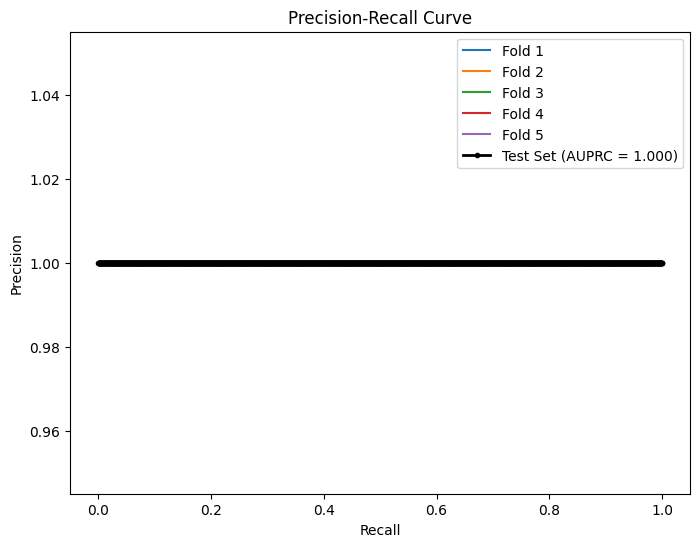

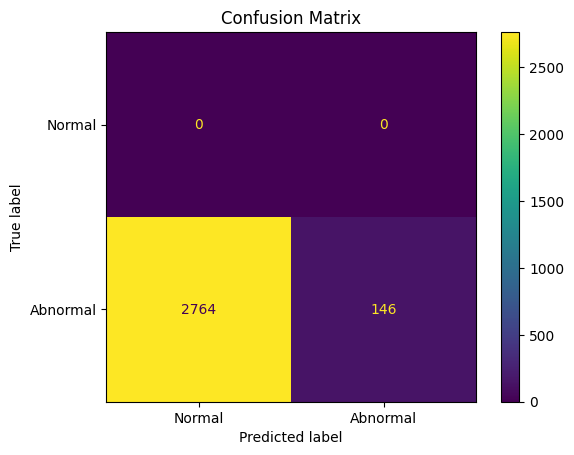

In [ ]:
data_normal = pd.read_csv(mypath + 'ptbdb_normal.csv')
data_abnormal = pd.read_csv(mypath + 'ptbdb_abnormal.csv')

# Remove the last column before concatenating
data_normal = data_normal.iloc[:, :-1]
data_abnormal = data_abnormal.iloc[:, :-1]

# Reset column names to ensure they are the same
data_normal.columns = [f'feature_{i}' for i in range(data_normal.shape[1])]
data_abnormal.columns = [f'feature_{i}' for i in range(data_abnormal.shape[1])]

# Add the label column
data_normal['label'] = 0
data_abnormal['label'] = 1

# Concatenate the dataframes along rows
data = pd.concat([data_normal, data_abnormal], axis=0).reset_index(drop=True)

# Separate labels before handling NaNs
labels = data['label'].values
data = data.drop('label', axis=1)

# Handling NaN values: Replace zeros with NaNs, then forward fill and backward fill
data = data.replace(0, np.nan)  # Assuming zeros are padding
data = data.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill

# Drop columns with all NaN values after filling
data = data.dropna(axis=1, how='all')

# Reattach labels
data['label'] = labels

# Ensure there is no empty data after handling NaNs
if data.empty:
    raise ValueError("Dataframe is empty after handling NaN values")

labels = data['label'].values
data = data.drop('label', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Scale the data after splitting
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Increase the number of timesteps for the input
timesteps = 10
n_features = X_train_full.shape[1] // timesteps
X_train_full = X_train_full[:, :n_features * timesteps]
X_train_full = X_train_full.reshape((X_train_full.shape[0], timesteps, n_features))
X_test = X_test[:, :n_features * timesteps]
X_test = X_test.reshape((X_test.shape[0], timesteps, n_features))

# Build CNN for feature extraction
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(timesteps, n_features)),
    MaxPooling1D(pool_size=2),
    Flatten()
])
cnn_model.compile(optimizer='adam', loss='mse')

# Extract features using the CNN model
cnn_features_train_full = cnn_model.predict(X_train_full)
cnn_features_test = cnn_model.predict(X_test)

cnn_features_train_full = cnn_features_train_full.reshape((cnn_features_train_full.shape[0], 1, -1))
cnn_features_test = cnn_features_test.reshape((cnn_features_test.shape[0], 1, -1))

# K-Fold Cross-Validation on extracted features
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auprc_scores = []
precision_vals = []
recall_vals = []

for k, (train_index, val_index) in enumerate(kf.split(cnn_features_train_full)):
    print(f"Fold {k+1}")
    X_train, X_val = cnn_features_train_full[train_index], cnn_features_train_full[val_index]
    y_train, y_val = y_train_full[train_index], y_train_full[val_index]

    # Ensure y_val is 1D
    y_val = y_val.flatten()

    # Build LSTM Autoencoder
    lstm_autoencoder = Sequential([
        LSTM(128, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True),
        LSTM(64, activation='relu', return_sequences=False),
        RepeatVector(1),
        LSTM(64, activation='relu', return_sequences=True),
        LSTM(128, activation='relu', return_sequences=True),
        TimeDistributed(Dense(X_train.shape[2]))
    ])
    lstm_autoencoder.compile(optimizer='adam', loss='mse')
    lstm_autoencoder.summary()

    # Train the LSTM Autoencoder
    lstm_autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Reconstruction error
    reconstructions = lstm_autoencoder.predict(X_val)
    reconstruction_error = np.mean(np.abs(reconstructions - X_val), axis=2).flatten()

    # Precision-Recall curve and AUPRC
    precision, recall, thresholds = precision_recall_curve(y_val, reconstruction_error)
    auprc = auc(recall, precision)
    auprc_scores.append(auprc)
    precision_vals.append(precision)
    recall_vals.append(recall)

# Average AUPRC
average_auprc = np.mean(auprc_scores)
print(f'Average AUPRC over {kf.n_splits} folds: {average_auprc:.3f}')

# Train LSTM Autoencoder on the full training set
lstm_autoencoder.fit(cnn_features_train_full, cnn_features_train_full, epochs=50, batch_size=32, verbose=0)

# Evaluate on the final test set
reconstructions = lstm_autoencoder.predict(cnn_features_test)
reconstruction_error = np.mean(np.abs(reconstructions - cnn_features_test), axis=2).flatten()

precision, recall, thresholds = precision_recall_curve(y_test, reconstruction_error)
auprc_test = auc(recall, precision)
print(f'AUPRC on the test set: {auprc_test:.3f}')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
for i in range(len(precision_vals)):
    plt.plot(recall_vals[i], precision_vals[i], label=f'Fold {i+1}')
plt.plot(recall, precision, marker='.', label=f'Test Set (AUPRC = {auprc_test:.3f})', linewidth=2, color='black')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix
threshold = np.percentile(reconstruction_error, 95)  # Example threshold
y_pred = (reconstruction_error > threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()


91/91 [==============================] - 0s 2ms/step
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 1, 128)            197120    
                                                                 
 lstm_25 (LSTM)              (None, 64)                49408     
                                                                 
 repeat_vector_6 (RepeatVec  (None, 1, 64)             0         
 tor)                                                            
                                                                 
 lstm_26 (LSTM)              (None, 1, 64)             33024     
                                                                 
 lstm_27 (LSTM)              (None, 1, 128)            98816     
                                                                 
 time_distributed_6 (TimeDi  (None, 1, 256)            33024     


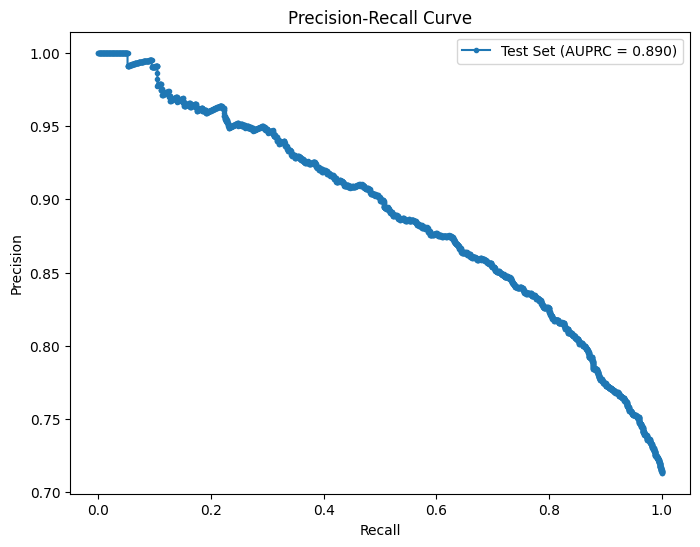

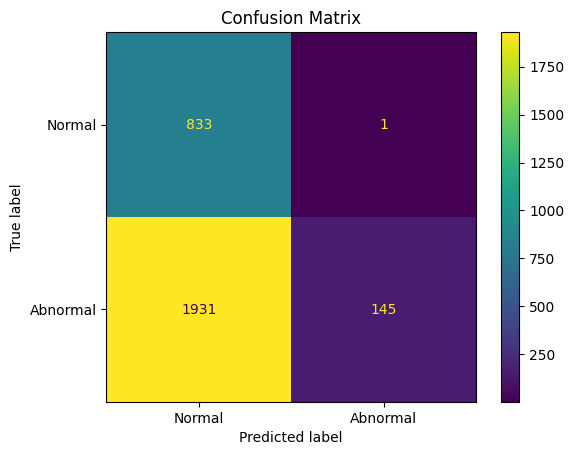

In [ ]:
data_normal = pd.read_csv(mypath + 'ptbdb_normal.csv')
data_abnormal = pd.read_csv(mypath + 'ptbdb_abnormal.csv')

# Remove the last column before concatenating
data_normal = data_normal.iloc[:, :-1]
data_abnormal = data_abnormal.iloc[:, :-1]

# Reset column names to ensure they are the same
data_normal.columns = [f'feature_{i}' for i in range(data_normal.shape[1])]
data_abnormal.columns = [f'feature_{i}' for i in range(data_abnormal.shape[1])]

# Add the label column
data_normal['label'] = 0
data_abnormal['label'] = 1

# Concatenate the dataframes along rows
data = pd.concat([data_normal, data_abnormal], axis=0).reset_index(drop=True)

# Separate labels before handling NaNs
labels = data['label'].values
data = data.drop('label', axis=1)

# Handling NaN values: Replace zeros with NaNs, then forward fill and backward fill
data = data.replace(0, np.nan)  # Assuming zeros are padding
data = data.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill

# Drop columns with all NaN values after filling
data = data.dropna(axis=1, how='all')

# Reattach labels
data['label'] = labels

# Ensure there is no empty data after handling NaNs
if data.empty:
    raise ValueError("Dataframe is empty after handling NaN values")

labels = data['label'].values
data = data.drop('label', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Scale the data after splitting
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Increase the number of timesteps for the input
timesteps = 10
n_features = X_train.shape[1] // timesteps
X_train = X_train[:, :n_features * timesteps]
X_train = X_train.reshape((X_train.shape[0], timesteps, n_features))
X_test = X_test[:, :n_features * timesteps]
X_test = X_test.reshape((X_test.shape[0], timesteps, n_features))

# Build CNN for feature extraction
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(timesteps, n_features)),
    MaxPooling1D(pool_size=2),
    Flatten()
])
cnn_model.compile(optimizer='adam', loss='mse')

# Extract features using the CNN model
cnn_features_train = cnn_model.predict(X_train)
cnn_features_test = cnn_model.predict(X_test)

cnn_features_train = cnn_features_train.reshape((cnn_features_train.shape[0], 1, -1))
cnn_features_test = cnn_features_test.reshape((cnn_features_test.shape[0], 1, -1))

# Build LSTM Autoencoder
lstm_autoencoder = Sequential([
    LSTM(128, activation='relu', input_shape=(1, cnn_features_train.shape[2]), return_sequences=True),
    LSTM(64, activation='relu', return_sequences=False),
    RepeatVector(1),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(cnn_features_train.shape[2]))
])
lstm_autoencoder.compile(optimizer='adam', loss='mse')
lstm_autoencoder.summary()

# Train the LSTM Autoencoder
lstm_autoencoder.fit(cnn_features_train, cnn_features_train,
                     epochs=50,
                     batch_size=32,
                     validation_split=0.2,
                     verbose=0)

# Evaluate on the test set
reconstructions = lstm_autoencoder.predict(cnn_features_test)
reconstruction_error = np.mean(np.abs(reconstructions - cnn_features_test), axis=2).flatten()

# Precision-Recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, reconstruction_error)
auprc_test = auc(recall, precision)
print(f'AUPRC on the test set: {auprc_test:.3f}')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Test Set (AUPRC = {auprc_test:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix
threshold = np.percentile(reconstruction_error, 95)  # Example threshold
y_pred = (reconstruction_error > threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()



# Build CNN for feature extraction
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(timesteps, n_features), kernel_regularizer='l2'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten()
])
cnn_model.compile(optimizer='adam', loss='mse')

# Build LSTM Autoencoder
lstm_autoencoder = Sequential([
    LSTM(128, activation='relu', input_shape=(1, cnn_features_train.shape[2]), return_sequences=True, kernel_regularizer='l2'),
    Dropout(0.3),
    LSTM(64, activation='relu', return_sequences=False, kernel_regularizer='l2'),
    RepeatVector(1),
    LSTM(64, activation='relu', return_sequences=True, kernel_regularizer='l2'),
    Dropout(0.3),
    LSTM(128, activation='relu', return_sequences=True, kernel_regularizer='l2'),
    TimeDistributed(Dense(cnn_features_train.shape[2]))
])


### 4.1 LSTM AutoEncoder + CNN - Cross validation

91/91 [==============================] - 0s 2ms/step
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 1, 128)            197120    
                                                                 
 lstm_65 (LSTM)              (None, 64)                49408     
                                                                 
 repeat_vector_16 (RepeatVe  (None, 1, 64)             0         
 ctor)                                                           
                                                                 
 lstm_66 (LSTM)              (None, 1, 64)             33024     
                                                                 
 lstm_67 (LSTM)              (None, 1, 128)            98816     
                                                                 
 time_distributed_16 (TimeD  (None, 1, 256)            33024     


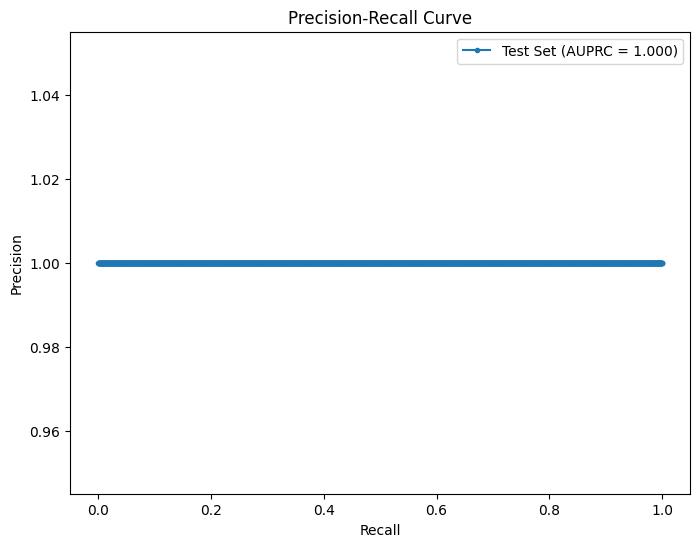

In [ ]:
data_normal = pd.read_csv(mypath + 'ptbdb_normal.csv')
data_abnormal = pd.read_csv(mypath + 'ptbdb_abnormal.csv')

data_normal = data_normal.iloc[:, :-1]
data_abnormal = data_abnormal.iloc[:, :-1]

# Reset column names to ensure they are the same
data_normal.columns = [f'feature_{i}' for i in range(data_normal.shape[1])]
data_abnormal.columns = [f'feature_{i}' for i in range(data_abnormal.shape[1])]

# Add the label column
data_normal['label'] = 0
data_abnormal['label'] = 1

data = pd.concat([data_normal, data_abnormal], axis = 0).reset_index(drop=True)

# Handling NaN values: Replace zeros with NaNs, then forward fill and backward fill
data = data.replace(0, np.nan)  # Assuming zeros are padding
data = data.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill

# Drop columns with all NaN values after filling
data = data.dropna(axis=1, how='all')

# Ensure there is no empty data after handling NaNs
if data.empty:
    raise ValueError("Dataframe is empty after handling NaN values")

labels = data['label'].values
data = data.drop('label', axis=1)

# Split the data into training and final test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Scale the data after splitting
scaler = MinMaxScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

# Increase the number of timesteps for the input
timesteps = 10
n_features = X_train_full.shape[1] // timesteps
X_train_full = X_train_full[:, :n_features * timesteps]
X_train_full = X_train_full.reshape((X_train_full.shape[0], timesteps, n_features))
X_test = X_test[:, :n_features * timesteps]
X_test = X_test.reshape((X_test.shape[0], timesteps, n_features))

# Build CNN for feature extraction
cnn_model = Sequential(name='cnn_feature_extractor')
cnn_model.add(Conv1D(filters=64,
                     kernel_size=2,
                     activation='relu',
                     input_shape=(timesteps, n_features)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.compile(optimizer='adam', loss='mse')

# Extract features using the CNN model
cnn_features_train_full = cnn_model.predict(X_train_full)
cnn_features_test = cnn_model.predict(X_test)

cnn_features_train_full = cnn_features_train_full.reshape((cnn_features_train_full.shape[0], 1, -1))
cnn_features_test = cnn_features_test.reshape((cnn_features_test.shape[0], 1, -1))

# K-Fold Cross-Validation on extracted features
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auprc_scores = []
precision_vals = []
recall_vals = []

for train_index, val_index in kf.split(cnn_features_train_full):
    print("----------------K FOLD START------------------------")
    X_train, X_val = cnn_features_train_full[train_index], cnn_features_train_full[val_index]
    y_train, y_val = y_train_full[train_index], y_train_full[val_index]

    # Ensure y_val is 1D
    y_val = y_val.flatten()

    # Build LSTM Autoencoder
    lstm_autoencoder = Sequential([
        LSTM(128, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True),
        LSTM(64, activation='relu', return_sequences=False),
        RepeatVector(1),
        LSTM(64, activation='relu', return_sequences=True),
        LSTM(128, activation='relu', return_sequences=True),
        TimeDistributed(Dense(X_train.shape[2]))
    ])
    lstm_autoencoder.compile(optimizer='adam', loss='mse')
    lstm_autoencoder.summary()

    # Train the LSTM Autoencoder
    lstm_autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Reconstruction error
    reconstructions = lstm_autoencoder.predict(X_val)
    reconstruction_error = np.mean(np.abs(reconstructions - X_val), axis=2).flatten()

    # Precision-Recall curve and AUPRC
    precision, recall, thresholds = precision_recall_curve(y_val, reconstruction_error)
    auprc = auc(recall, precision)
    auprc_scores.append(auprc)
    precision_vals.append(precision)
    recall_vals.append(recall)

# Average AUPRC
average_auprc = np.mean(auprc_scores)
print(f'Average AUPRC over {kf.n_splits} folds: {average_auprc:.3f}')

# Train LSTM Autoencoder on the full training set
lstm_autoencoder.fit(cnn_features_train_full, cnn_features_train_full, epochs=50, batch_size=32, verbose=0)

# Evaluate on the final test set
reconstructions = lstm_autoencoder.predict(cnn_features_test)
reconstruction_error = np.mean(np.abs(reconstructions - cnn_features_test), axis=2).flatten()

precision, recall, thresholds = precision_recall_curve(y_test, reconstruction_error)
auprc_test = auc(recall, precision)
print(f'AUPRC on the test set: {auprc_test:.3f}')
